<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        PREDICTING CO2 EMISSIONS WITH ML LINEAR MODELS
    </h1>
    </div>

<h2 align="center"><font color=#20a0ff> Linear Regression </font></h2> 
<h3 align="center"><font color=#20a0ff> Amarja Kumbhar </font></h3> 



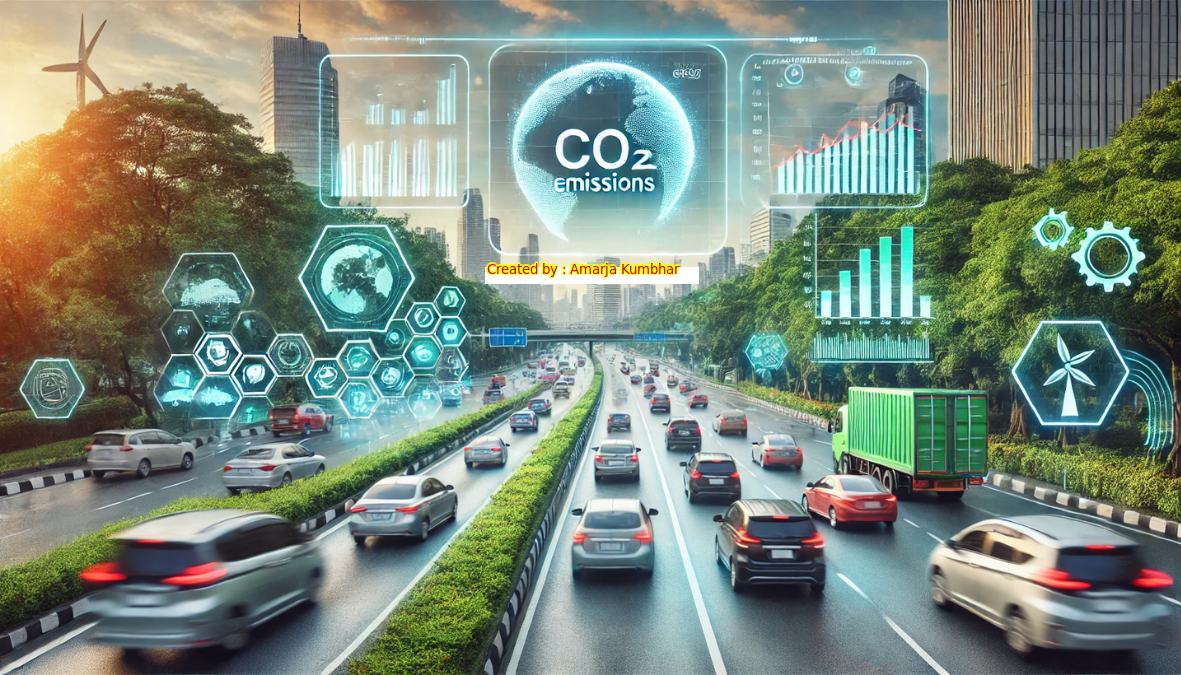

## <font color=#20a0ff> <b>About the Project</b><font>
 
**Objective:** The goal of this project is perform an EDA to prepare the data for a Machine Learning Model, focusing on building a Linear Model.
    
The project consists of two main phases:

1. **Exploratory Data Analysis (EDA)**: 
    - For the dataset of Co2 Emission by Vehicle in Canada, performed an Exploratory Data Analysis (EDA) to understand the general structure of the dataset, summarize key statistical insights, and explore relationships between independent variables and the target variable. 
    
    
2. **Machine Learning Model**: Preparing the data and building models, including Simple and Multiple Linear Regression, Polynomial Regression, and Regularization techniques.
   - **Simple Linear Regression Model**: 
   - **Multiple Linear Regression Model**:
   - **Polynomial Regression Model**: 
   - **Scaling the Data**: 
 
   - **Final Model and Prediction**: The final model was built and predictions were made.
   

- This dataset contains information about various vehicles' carbon dioxide (CO2) emissions and fuel consumption. 
- In the context of Machine Learning (ML), this dataset is often used to predict CO2 emissions based on vehicle characteristics or to analyze fuel efficiency of vehicles. 
- The goal could be to predict CO2 emissions or fuel consumption based on the features of the vehicles.
- There are total 7385 rows and 12 columns. 
- This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years.

Data Source: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles



**The columns in the dataset can be described as follows:**

1. **Make**: The brand of the vehicle.
2. **Model**: The model of the vehicle.
3. **Vehicle Class**: The class of the vehicle (e.g., compact, SUV).
4. **Engine Size(L)**: The engine size in liters.
5. **Cylinders**: The number of cylinders in the engine.
6. **Transmission**: The type of transmission (e.g., automatic, manual).
7. **Fuel Type**: The type of fuel used (e.g., gasoline, diesel).
8. **Fuel Consumption City (L/100 km)**: Fuel consumption in the city (liters per 100 kilometers).
9. **Fuel Consumption Hwy (L/100 km)**: Highway (out-of-city) fuel consumption.
10. **Fuel Consumption Comb (L/100 km)**: Combined (city and highway) fuel consumption.
11. **Fuel Consumption Comb (mpg)**: Combined fuel consumption in miles per gallon. (efficiency-> less fule long way)
12. **CO2 Emissions(g/km)**: CO2 emissions in grams per kilometer.

**NOTE:**
    
11. **Fuel Consumption Comb (mpg)**:

- High mpg value: The vehicle operates more efficiently, consumes less fuel, and thus produces less CO2 emissions.
- Low mpg value: The vehicle consumes more fuel and produces more CO2 emissions.
    - Therefore, there is a negative relationship between "Fuel Consumption Comb (mpg)" and "CO2 Emissions."
    - As fuel efficiency increases (mpg value increases), CO2 emissions decrease.
    - This explains why environmentally friendly vehicles have high mpg values and produce fewer CO2 emissions.

    
**Model**

**The "Model" column includes terms that identify specific features or configurations of vehicles:**
- `4WD/4X4`: Four-wheel drive. A drive system where all four wheels receive power.
- `AWD`: All-wheel drive. Similar to 4WD but often with more complex mechanisms for power distribution.
- `FFV`: Flexible-fuel vehicle. Vehicles that can use multiple types of fuel, such as both gasoline and ethanol blends.
- `SWB`: Short wheelbase.
- `LWB`: Long wheelbase.
- `EWB`: Extended wheelbase. 

**Transmission**

**The "Transmission" column indicates the type of transmission system in the vehicle:**
- `A`: Automatic. A transmission type that operates without the need for the driver to manually change gears.
- `AM`: Automated manual. A version of a manual transmission that is automated.
- `AS`: Automatic with select shift. An automatic transmission that allows for manual intervention.
- `AV`: Continuously variable. A transmission that uses continuously varying ratios instead of fixed gear ratios.
- `M`: Manual. A transmission type that requires the driver to manually change gears.
- `3 - 10`: Number of gears in the transmission.

**Fuel Type**

**The "Fuel Type" column specifies the type of fuel used by the vehicle:**
- `X`: Regular gasoline.
- `Z`: Premium gasoline.
- `D`: Diesel.
- `E`: Ethanol (E85).
- `N`: Natural gas.

**Vehicle Class**

**The "Vehicle Class" column categorizes vehicles by size and type:**
- `COMPACT`: Smaller-sized vehicles.
- `SUV - SMALL`: Smaller-sized sports utility vehicles.
- `MID-SIZE`: Medium-sized vehicles.
- `TWO-SEATER`: Vehicles with two seats.
- `MINICOMPACT`: Very small-sized vehicles.
- `SUBCOMPACT`: Smaller than compact-sized vehicles.
- `FULL-SIZE`: Larger-sized vehicles.
- `STATION WAGON - SMALL`: Smaller-sized station wagons.
- `SUV - STANDARD`: Standard-sized sports utility vehicles.
- `VAN - CARGO`: Vans designed for cargo.
- `VAN - PASSENGER`: Vans designed for passenger transportation.
- `PICKUP TRUCK - STANDARD`: Standard-sized pickup trucks.
- `MINIVAN`: Smaller-sized vans.
- `SPECIAL PURPOSE VEHICLE`: Vehicles designed for special purposes.
- `STATION WAGON - MID-SIZE`: Mid-sized station wagons.
- `PICKUP TRUCK - SMALL`: Smaller-sized pickup trucks.

This dataset can be used to understand the fuel efficiency and environmental impact of vehicles. Machine learning models can use these features to predict CO2 emissions or perform analyses comparing the fuel consumption of different vehicles.

<a id='eda'></a>
# <font color=#20a0ff> <b>  EXPLORATORY DATA ANALYSIS(EDA)</b><font color='orange'>

In [261]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import scipy.stats as stats

%matplotlib inline  

from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

In [262]:
co2 = pd.read_csv('CO2 Emissions_Canada.csv')
df = co2.copy()

<a id='understanding'></a>
## Understanding the Data

In [263]:
df.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

In [264]:
# Display random 5 sample 

df.sample(5)

Make              Model            Vehicle Class  Engine Size(L)  \
6688   CHEVROLET       Colorado 4WD     PICKUP TRUCK - SMALL             2.5   
6          ACURA                 TL                 MID-SIZE             3.5   
327        DODGE  GRAND CARAVAN FFV                  MINIVAN             3.6   
369         FORD              F-150  PICKUP TRUCK - STANDARD             3.5   
6464  VOLKSWAGEN              Atlas              SUV - SMALL             2.0   

      Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
6688          4           A6         X                              12.6   
6             6          AS6         Z                              11.8   
327           6           A6         E                              19.2   
369           6           A6         X                              14.5   
6464          4          AS8         X                              11.6   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
6688                              9.7                              11.3   
6                                 8.1                              10.1   
327                              13.1                              16.5   
369                              10.6                              12.7   
6464                              9.1                              10.5   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
6688                           25                  265  
6                              28                  232  
327                            17                  264  
369                            22                  292  
6464                           27                  245

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [266]:
df.isnull().values.any()


False

In [267]:
# Check out the missing values

missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

count  percentage
Make                                  0         0.0
Model                                 0         0.0
Vehicle Class                         0         0.0
Engine Size(L)                        0         0.0
Cylinders                             0         0.0
Transmission                          0         0.0
Fuel Type                             0         0.0
Fuel Consumption City (L/100 km)      0         0.0
Fuel Consumption Hwy (L/100 km)       0         0.0
Fuel Consumption Comb (L/100 km)      0         0.0
Fuel Consumption Comb (mpg)           0         0.0
CO2 Emissions(g/km)                   0         0.0

In [268]:
# Check out the duplicated values!!!!!!!!

df.duplicated().sum()

1103

In [269]:
duplicated_rows = df[df.duplicated(keep=False)]

duplicated_rows

Make       Model            Vehicle Class  Engine Size(L)  \
4            ACURA     RDX AWD              SUV - SMALL             3.5   
5            ACURA         RLX                 MID-SIZE             3.5   
12      ALFA ROMEO          4C               TWO-SEATER             1.8   
13    ASTON MARTIN         DB9              MINICOMPACT             5.9   
15    ASTON MARTIN  V8 VANTAGE               TWO-SEATER             4.7   
...            ...         ...                      ...             ...   
7356        TOYOTA      Tundra  PICKUP TRUCK - STANDARD             5.7   
7365    VOLKSWAGEN    Golf GTI                  COMPACT             2.0   
7366    VOLKSWAGEN       Jetta                  COMPACT             1.4   
7367    VOLKSWAGEN       Jetta                  COMPACT             1.4   
7368    VOLKSWAGEN   Jetta GLI                  COMPACT             2.0   

      Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
4             6          AS6         Z                              12.1   
5             6          AS6         Z                              11.9   
12            4          AM6         Z                               9.7   
13           12           A6         Z                              18.0   
15            8          AM7         Z                              17.4   
...         ...          ...       ...                               ...   
7356          8          AS6         X                              17.7   
7365          4           M6         X                               9.8   
7366          4          AS8         X                               7.8   
7367          4           M6         X                               7.9   
7368          4          AM7         X                               9.3   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
4                                 8.7                              10.6   
5                                 7.7                              10.0   
12                                6.9                               8.4   
13                               12.6                              15.6   
15                               11.3                              14.7   
...                               ...                               ...   
7356                             13.6                              15.9   
7365                              7.3                               8.7   
7366                              5.9                               7.0   
7367                              5.9                               7.0   
7368                              7.2                               8.4   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
4                              27                  244  
5                              28                  230  
12                             34                  193  
13                             18                  359  
15                             19                  338  
...                           ...                  ...  
7356                           18                  371  
7365                           32                  203  
7366                           40                  162  
7367                           40                  163  
7368                           34                  196  

[2102 rows x 12 columns]

Some duplicate rows are identical, while others have slight variations. Possible reasons for duplicates include:

1. **Data Entry Errors**: Same data entered multiple times.
2. **Different Periods**: Performance of the same model recorded over different years.
3. **Model Updates**: Comparing different versions of the same model.

Understanding the context and data collection methods is crucial to determine the cause of duplicates. Whether to drop duplicates depends on the analysis purpose:

- For unique observations, duplicates can be dropped.
- For analyzing changes over time or variations, keeping duplicates might be more appropriate.


* However, since I will be using a linear model, I do not plan to delete these rows because duplicate rows contain similar values. Linear regression tries to find the general trend of the data points and the fact that duplicate rows contain similar values does not lead to a major change in the model's predictions.

In [270]:
# Let's observe unique values 

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])
    #print(output_data)
    return output_df

In [271]:
get_unique_values(df)

Column Name  Number of Unique Values  \
0                               Make                       42   
1                              Model                     2053   
2                      Vehicle Class                       16   
3                     Engine Size(L)                       51   
4                          Cylinders                        8   
5                       Transmission                       27   
6                          Fuel Type                        5   
7   Fuel Consumption City (L/100 km)                      211   
8    Fuel Consumption Hwy (L/100 km)                      143   
9   Fuel Consumption Comb (L/100 km)                      181   
10       Fuel Consumption Comb (mpg)                       54   
11               CO2 Emissions(g/km)                      331   

                 Unique Values  Data Type  
0                             -    object  
1                             -    object  
2                             -    object  
3                             -   float64  
4   [4, 6, 12, 8, 10, 3, 5, 16]     int64  
5                             -    object  
6               [Z, D, X, E, N]    object  
7                             -   float64  
8                             -   float64  
9                             -   float64  
10                            -     int64  
11                            -     int64

In [272]:
# Basic statistics summary of Numerical features

df.describe().T

count        mean        std   min    25%  \
Engine Size(L)                    7385.0    3.160068   1.354170   0.9    2.0   
Cylinders                         7385.0    5.615030   1.828307   3.0    4.0   
Fuel Consumption City (L/100 km)  7385.0   12.556534   3.500274   4.2   10.1   
Fuel Consumption Hwy (L/100 km)   7385.0    9.041706   2.224456   4.0    7.5   
Fuel Consumption Comb (L/100 km)  7385.0   10.975071   2.892506   4.1    8.9   
Fuel Consumption Comb (mpg)       7385.0   27.481652   7.231879  11.0   22.0   
CO2 Emissions(g/km)               7385.0  250.584699  58.512679  96.0  208.0   

                                    50%    75%    max  
Engine Size(L)                      3.0    3.7    8.4  
Cylinders                           6.0    6.0   16.0  
Fuel Consumption City (L/100 km)   12.1   14.6   30.6  
Fuel Consumption Hwy (L/100 km)     8.7   10.2   20.6  
Fuel Consumption Comb (L/100 km)   10.6   12.6   26.1  
Fuel Consumption Comb (mpg)        27.0   32.0   69.0  
CO2 Emissions(g/km)               246.0  288.0  522.0

In [273]:
# Basic statistics summary of Object features

df.describe(include= 'object').T

count unique          top  freq
Make           7385     42         FORD   628
Model          7385   2053    F-150 FFV    32
Vehicle Class  7385     16  SUV - SMALL  1217
Transmission   7385     27          AS6  1324
Fuel Type      7385      5            X  3637

In [274]:
df.columns 

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

<a id='rename'></a>
## Rename the Columns

In [275]:
df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'
                    }, inplace=True)

In [276]:
df.columns 

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

<a id='data-visualisation'></a>
## <font color=#20a0ff> <b> Data Visualisation </b><font color='orange'>

<a id='categorical-features'></a>
## Categorical Features

<a id='dist-categorical'></a>
###  Distribution of Categorical Features

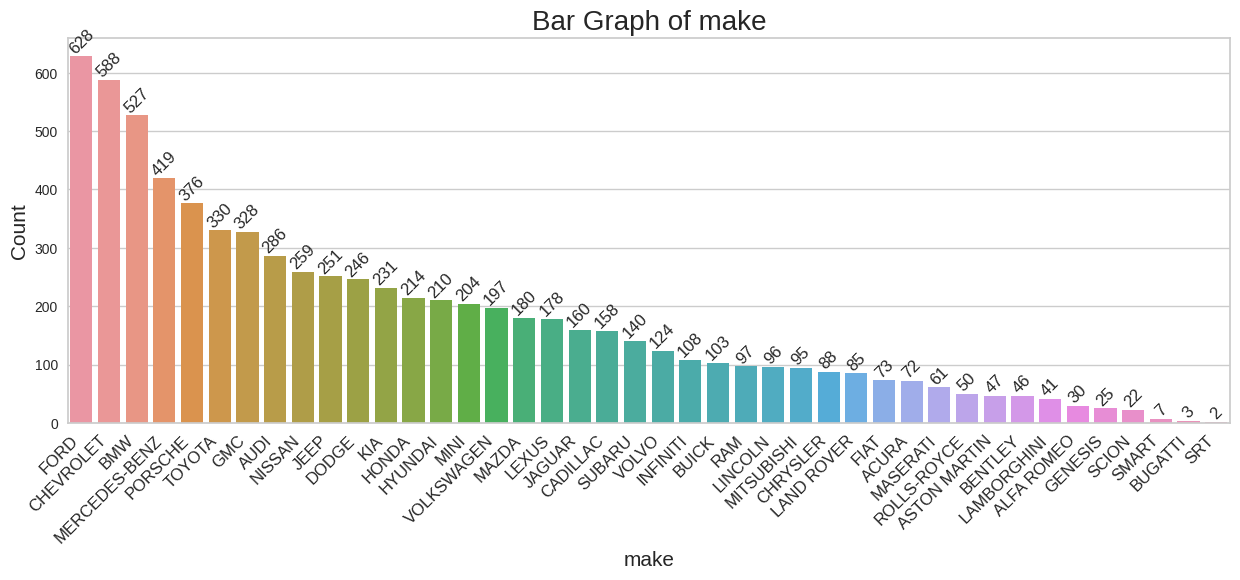

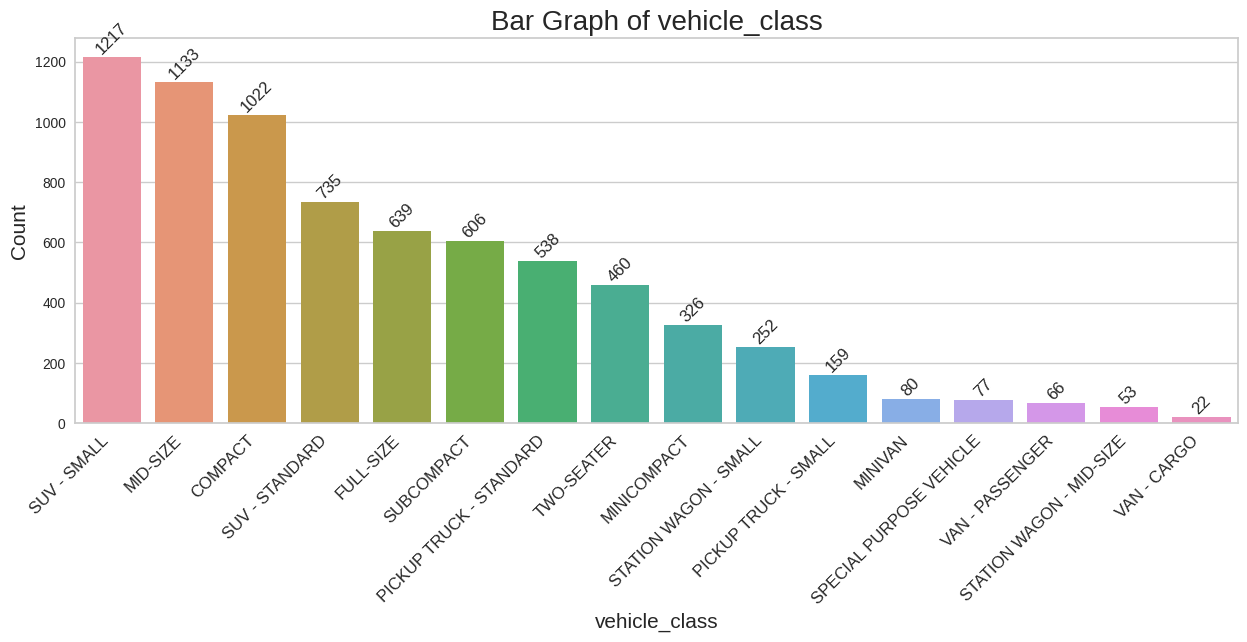

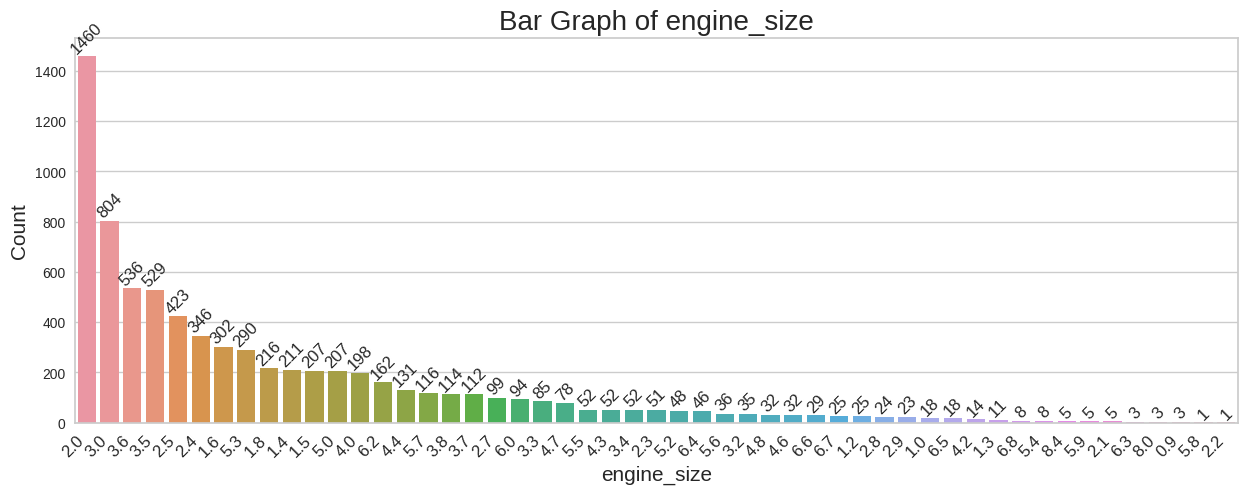

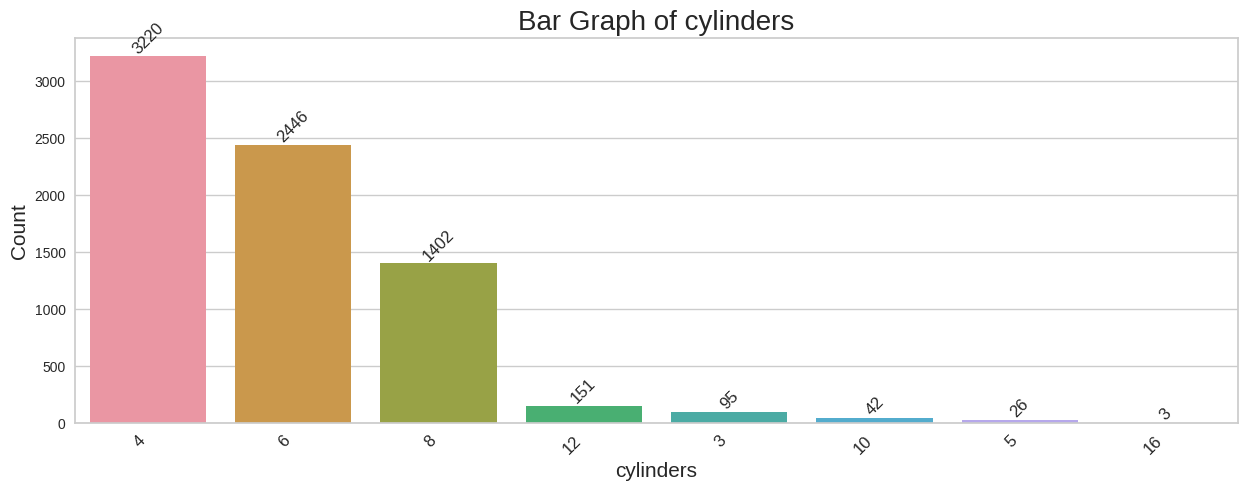

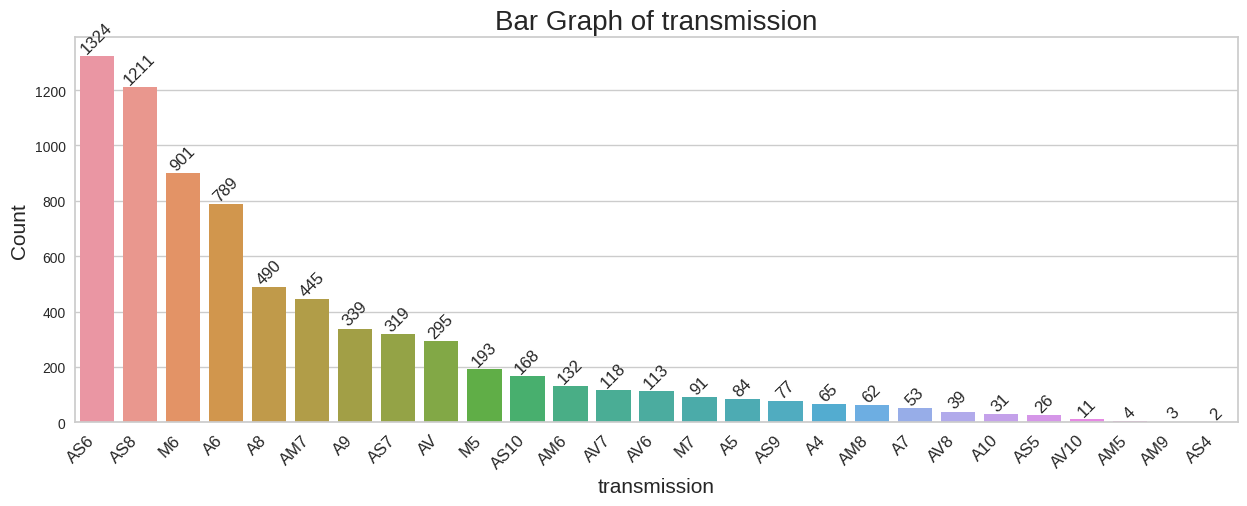

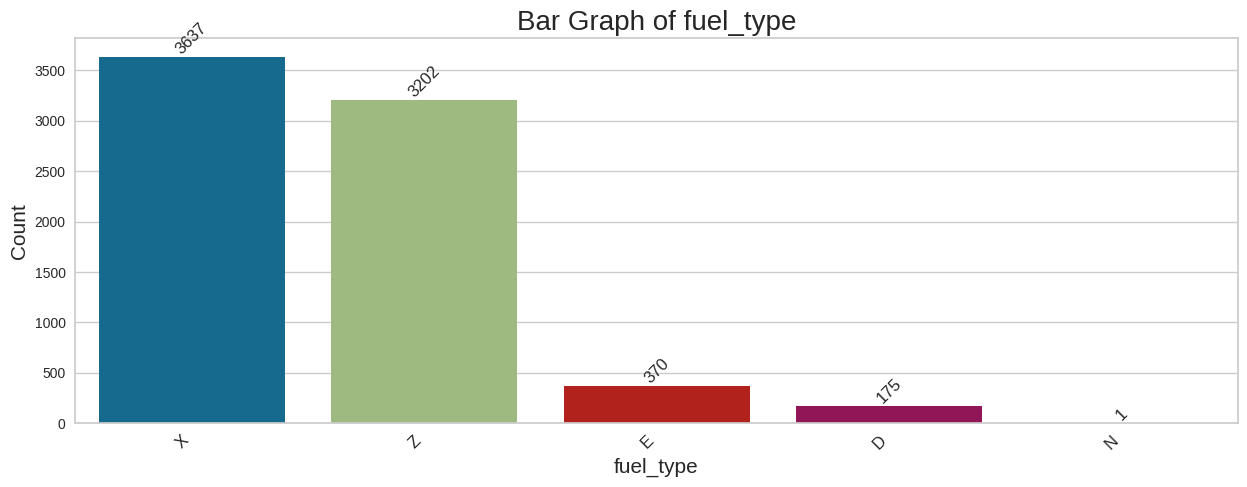

In [277]:
# Let's look at the distribution of our categorical characteristics with a bar graph

def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Bar Graph of {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
        
cat_features = ['make','vehicle_class', 'engine_size', 'cylinders', 'transmission', 'fuel_type']

plot_bar_graphs(df, cat_features)

In [278]:
# Model Feature

df.model.unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

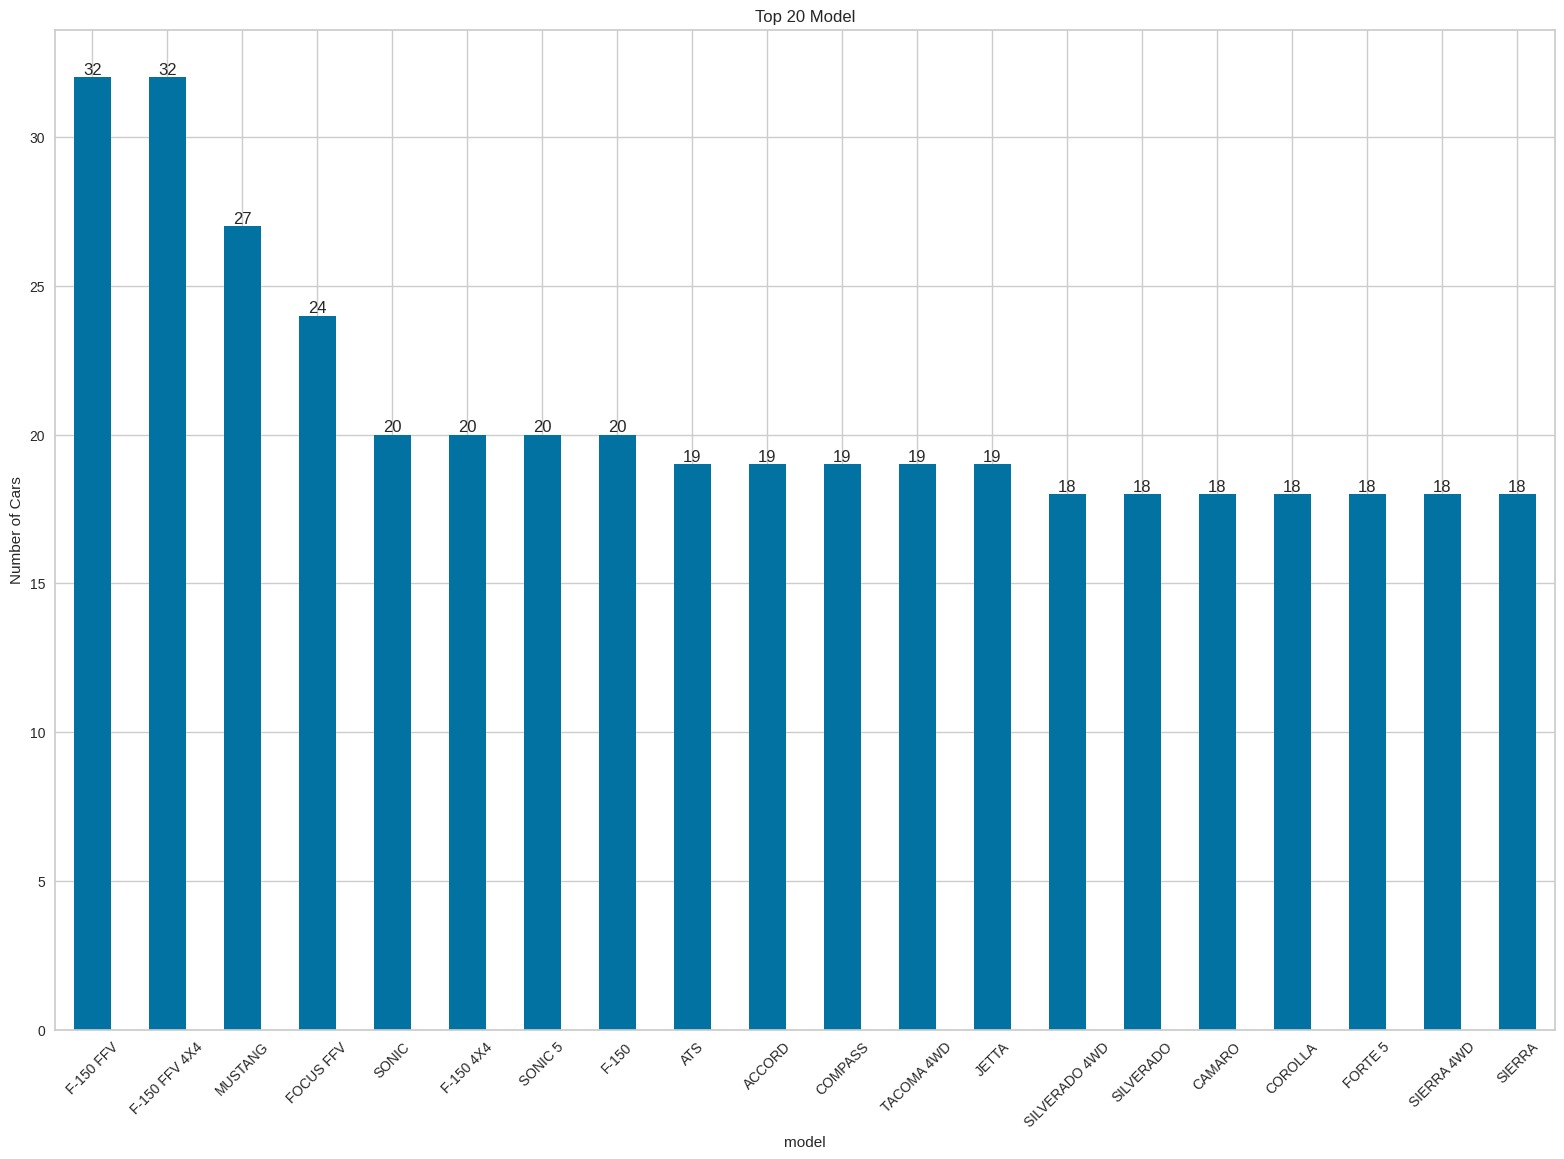

In [279]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_axes([0,0,1,1])
counts = df.model.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Top 20 Model')   
plt.xlabel('model') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## Conclusion: 
As can be seen from the graphs above:
- The number of vehicles consuming diesel, ethanol and natural gas fuel in the data set is very small.
- Widespread use of AS6, AS8, M6, A6, A9 as transmission options
- 4, 6, 8 are commonly used as cylinders option
- Engine Size (L) with 2.0 and 3.0 options in density
- The dataset is generally dominated by smaller sized vehicles

<a id='target-categorical'></a>
### Target Variable vs Categorical Features

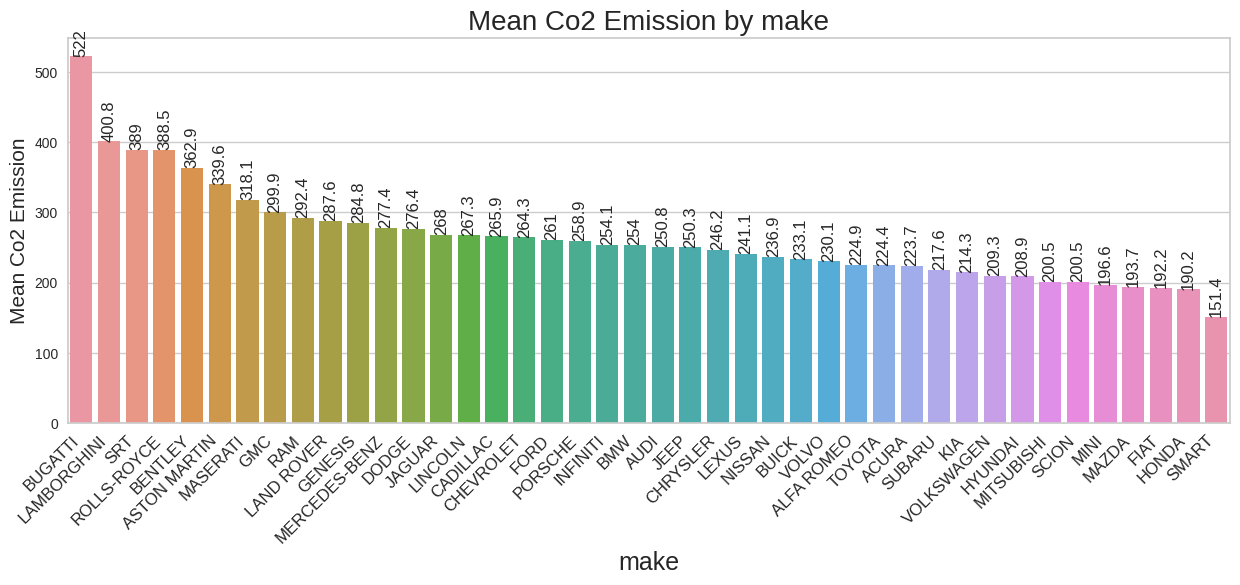

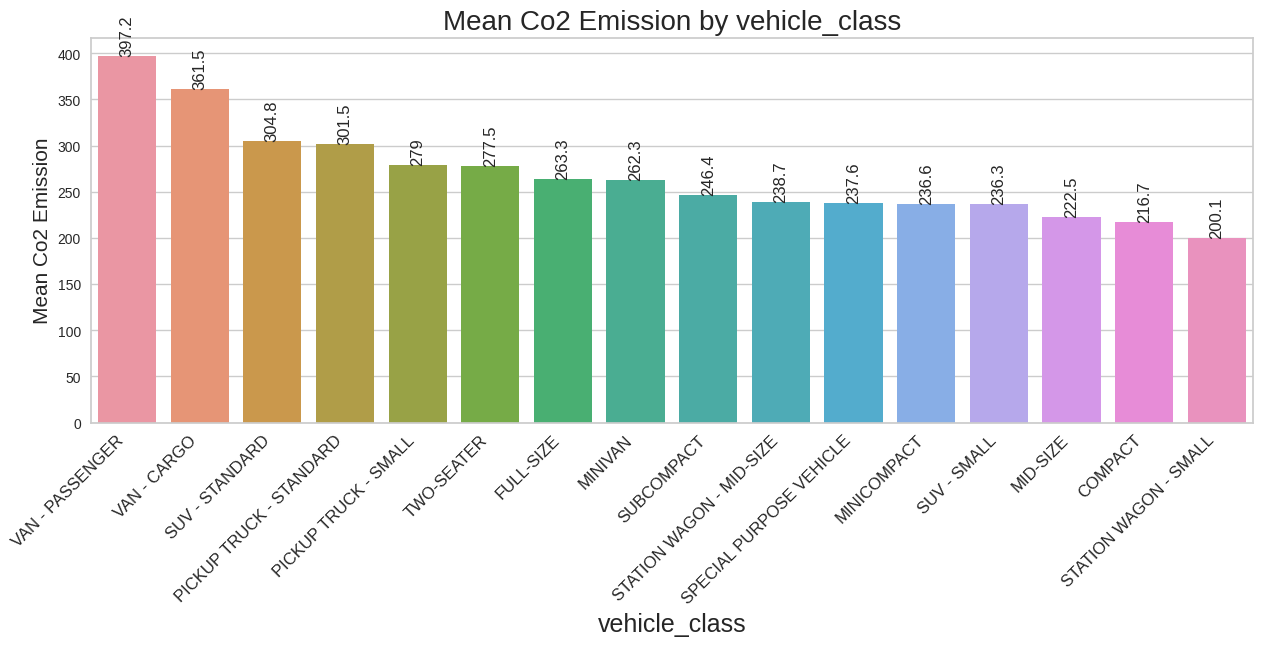

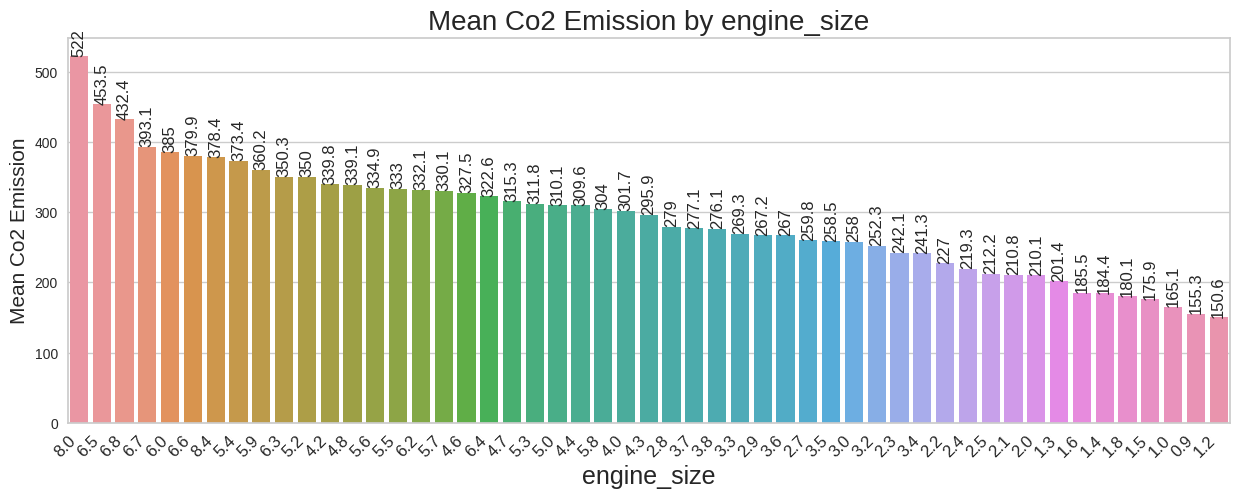

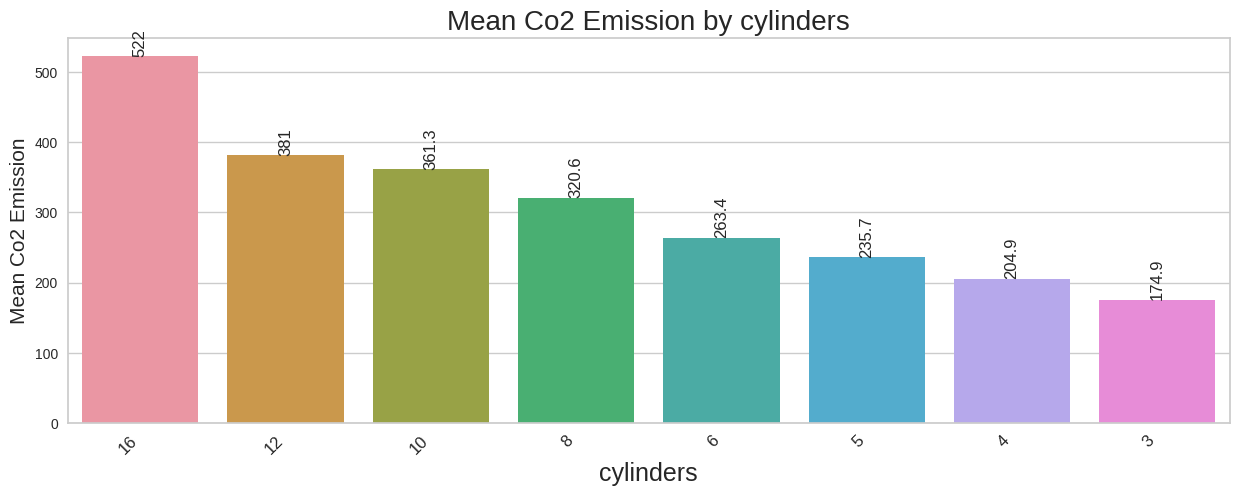

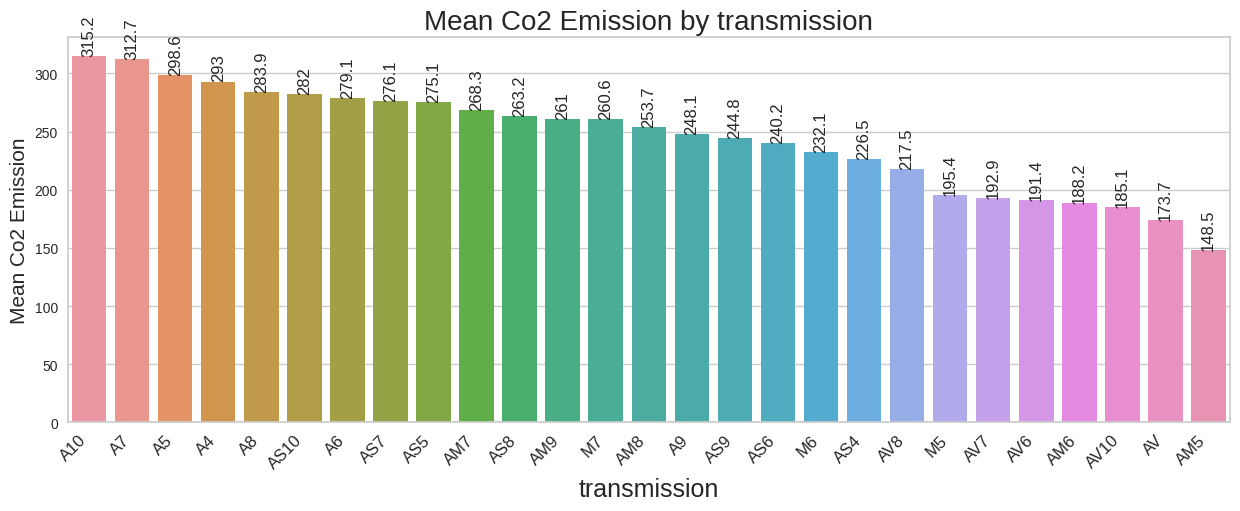

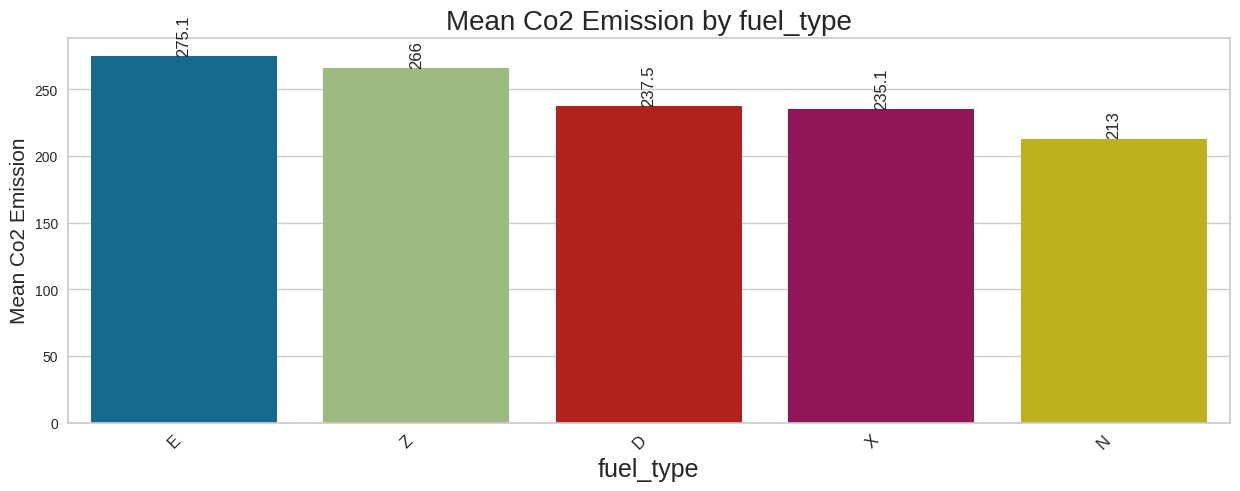

In [280]:
# Let's look at the relationship between our categorical attributes and the target variable

def plot_bar_with_co2(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        grouped_data = df.groupby(column)['co2'].mean().round(1).reset_index()
        grouped_data_sorted = grouped_data.sort_values(by='co2', ascending=False)
        ax = sns.barplot(x=column, y='co2', data=grouped_data_sorted, order=grouped_data_sorted[column])
        ax.bar_label(ax.containers[0],rotation=90)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Mean Co2 Emission', fontsize=15)
        plt.title(f'Mean Co2 Emission by {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
        
plot_bar_with_co2(df, cat_features)

## Conclusion: 
As can be seen from the graphs above:

* Bugatti has the highest average Co2 emissions
* Large-volume vehicles have high CO2 emission averages
* C02 emission averages of high volume and cylinders engines are also high
* Ethanol and Premium gasoline is the fuel with the highest average CO2

<a id='anova'></a>
### ANOVA Test for Categorical Features

In [281]:
# Perform ANOVA test for each categorical feature
anova_results = {}
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    groups = [df["co2"][df[feature] == category].values for category in df[feature].unique()]
    anova_results[feature] = stats.f_oneway(*groups)

# Display the ANOVA results
for feature, result in anova_results.items():
    print(f"ANOVA result for {feature}:")
    print(f"F-statistic: {result.statistic}, p-value: {result.pvalue}")
    print()


ANOVA result for make:
F-statistic: 106.8000265413262, p-value: 0.0

ANOVA result for model:
F-statistic: 58.405091462865016, p-value: 0.0

ANOVA result for vehicle_class:
F-statistic: 266.0228094521597, p-value: 0.0

ANOVA result for transmission:
F-statistic: 103.70394951088048, p-value: 0.0

ANOVA result for fuel_type:
F-statistic: 148.94555963595639, p-value: 1.062810397301377e-122



NOTE:

- The p-values for each of the Make, Model, Vehicle Class, Transmission, and Fuel Type variables are much smaller than 0.05, indicating that these variables create statistically significant differences in `co2_emissions`.


<a id='label-encoding'></a>
### Label Encoding the Categorical Features

Cverting all catogerical column into numerical category for correlation matrix

In [282]:
from sklearn.preprocessing import LabelEncoder

# Copy the original dataframe to avoid modifying it directly
df_labeled = df.copy()

# List of categorical columns
categorical_columns = ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

# Apply Label Encoding to each categorical column
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_labeled[column] = le.fit_transform(df_labeled[column])
    label_encoders[column] = le

# Display the first few rows of the labeled dataframe
print(df_labeled.head())


   make  model  vehicle_class  engine_size  cylinders  transmission  \
0     0   1057              0          2.0          4            14   
1     0   1057              0          2.4          4            25   
2     0   1058              0          1.5          4            22   
3     0   1233             11          3.5          6            15   
4     0   1499             11          3.5          6            15   

   fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
0          4             9.9            6.7             8.5   
1          4            11.2            7.7             9.6   
2          4             6.0            5.8             5.9   
3          4            12.7            9.1            11.1   
4          4            12.1            8.7            10.6   

   fuel_cons_comb_mpg  co2  
0                  33  196  
1                  29  221  
2                  48  136  
3                  25  255  
4                  27  244  


In [283]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make                7385 non-null   int64  
 1   model               7385 non-null   int64  
 2   vehicle_class       7385 non-null   int64  
 3   engine_size         7385 non-null   float64
 4   cylinders           7385 non-null   int64  
 5   transmission        7385 non-null   int64  
 6   fuel_type           7385 non-null   int64  
 7   fuel_cons_city      7385 non-null   float64
 8   fuel_cons_hwy       7385 non-null   float64
 9   fuel_cons_comb      7385 non-null   float64
 10  fuel_cons_comb_mpg  7385 non-null   int64  
 11  co2                 7385 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 692.5 KB


<a id='correlation-numerical and Categorical'></a>
### Correlations of Numerical Features

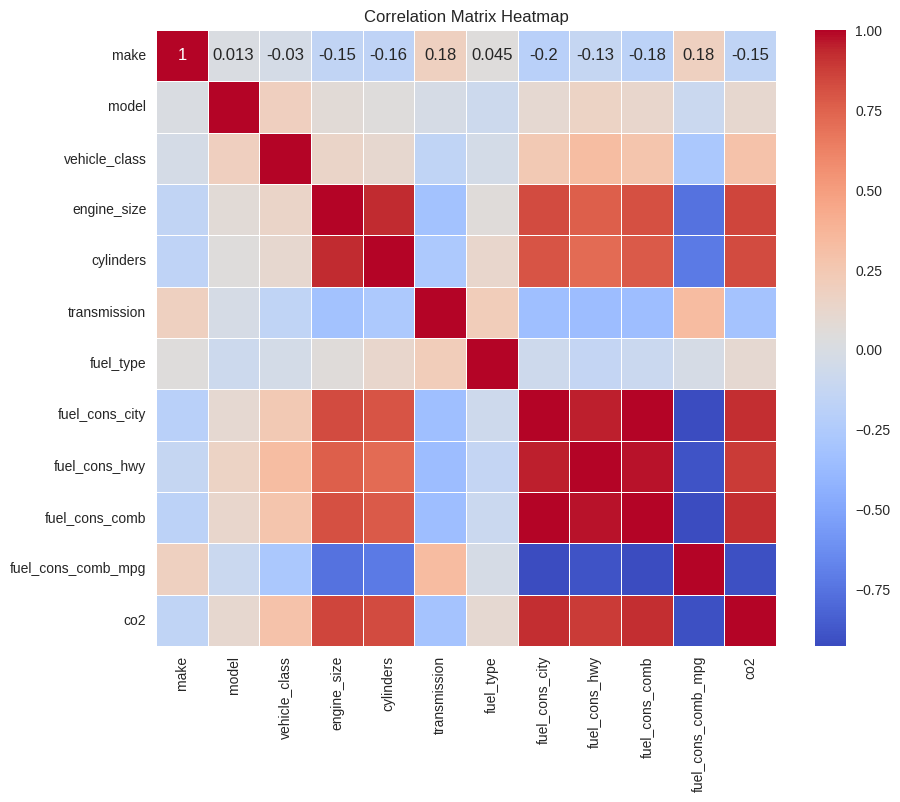

In [284]:
correlation_matrix = df_labeled.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

- The correlation matrix shows that features like `engine_size`, `cylinders`, and fuel consumption metrics (city, highway, combined) have strong positive correlations with `co2_emissions`. 
- Notably, `fuel_cons_mpg` has a strong negative correlation with CO2 emissions, indicating that higher fuel efficiency results in lower emissions.

- From a multicollinearity perspective, `fuel_cons_city`, `fuel_cons_hwy`, and `fuel_cons_comb` are highly intercorrelated, suggesting potential redundancy. 
    - It may be beneficial to select just one or combine them into a single metric to avoid multicollinearity.

- Key predictors for a CO2 emissions model include `engine_size`, `cylinders`, and fuel consumption metrics. 
- Categorical features such as `make`, `model`, `vehicle_class`, `transmission`, and `fuel_type` are also important due to their significant impact on CO2 emissions. 
    - Managing multicollinearity among these highly correlated features is crucial to ensure model stability and performance.


<a id='numerical-features'></a>
## Numerical Features

<a id='dist-numerical'></a>
### Distribution of Numerical Features

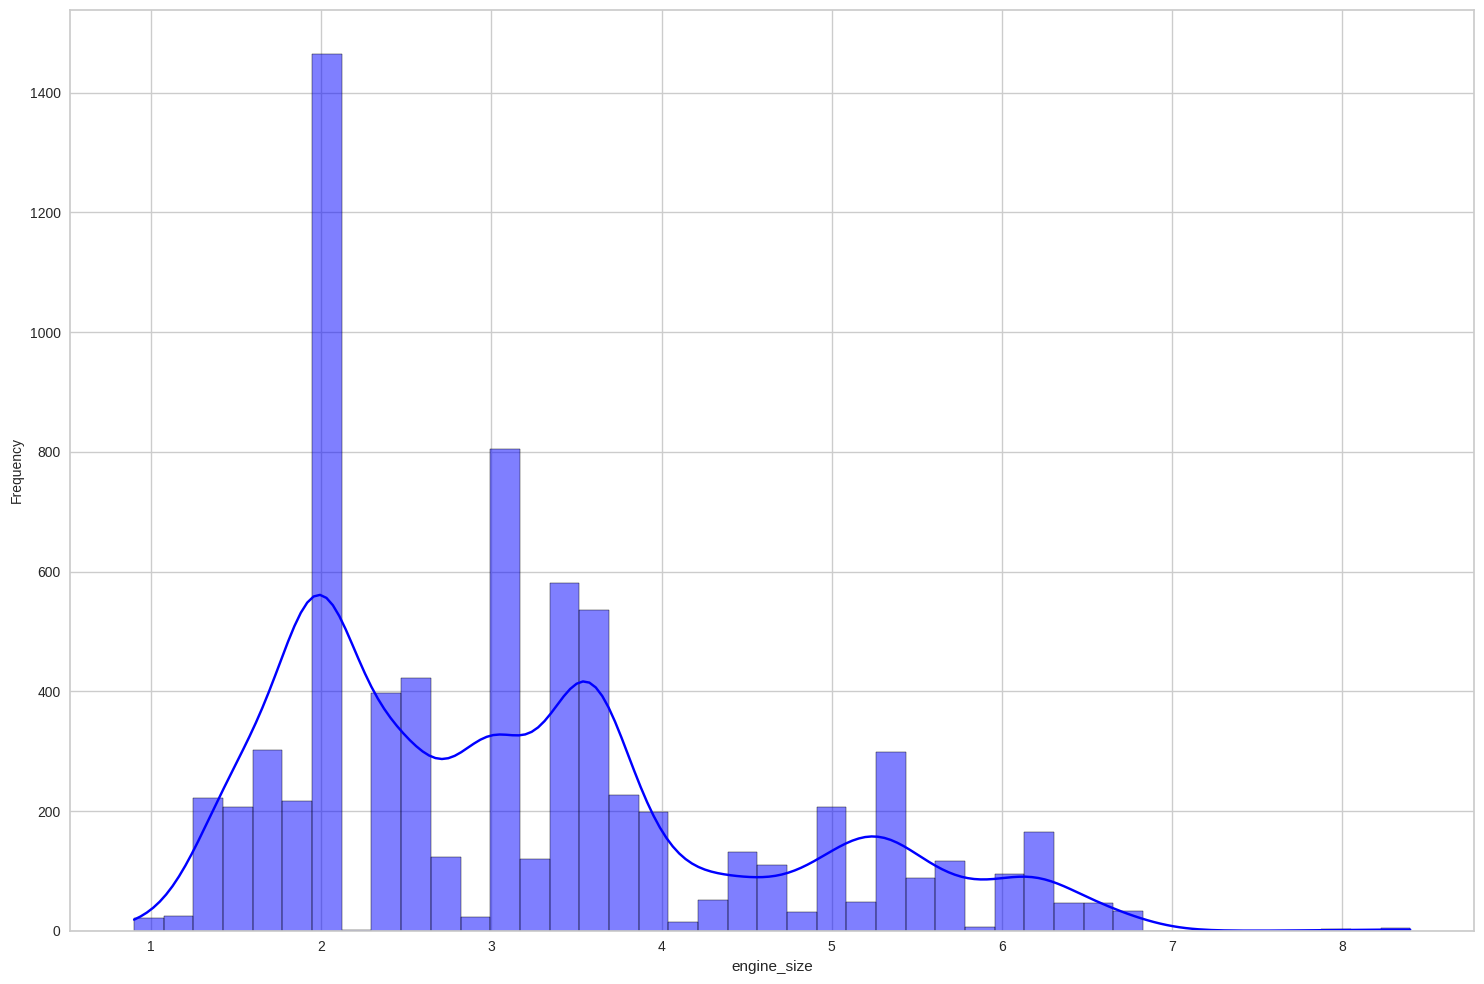

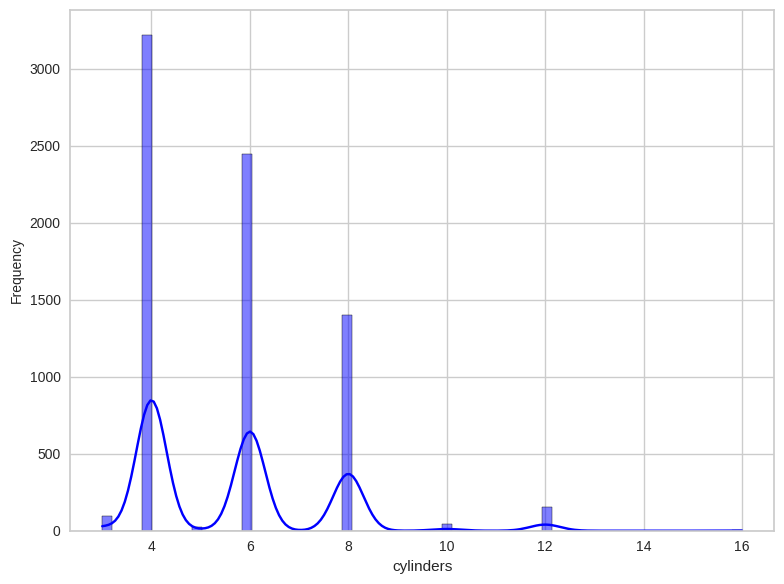

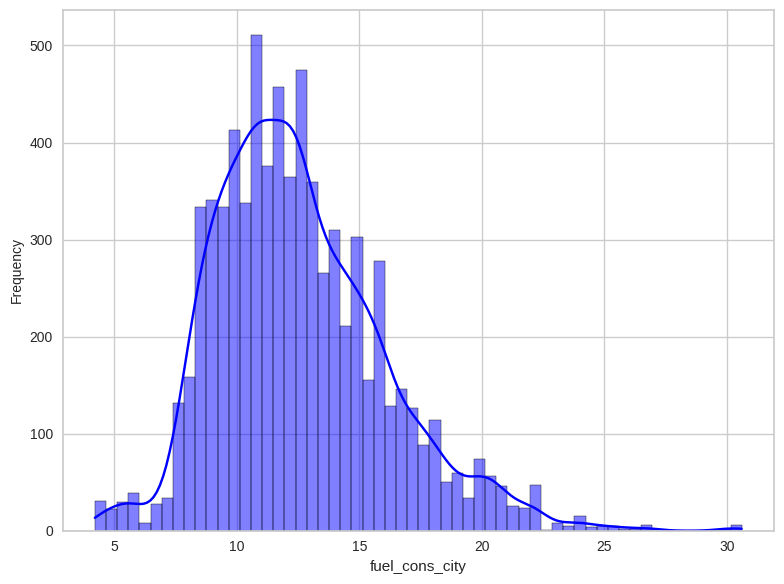

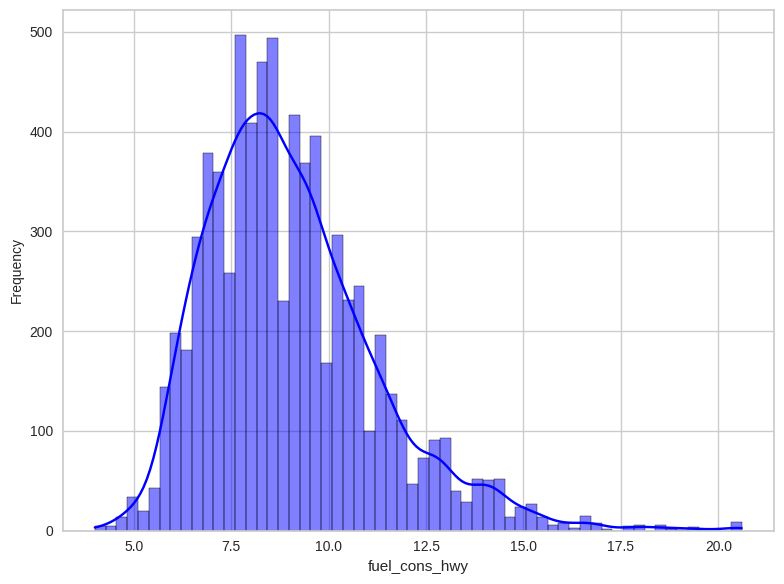

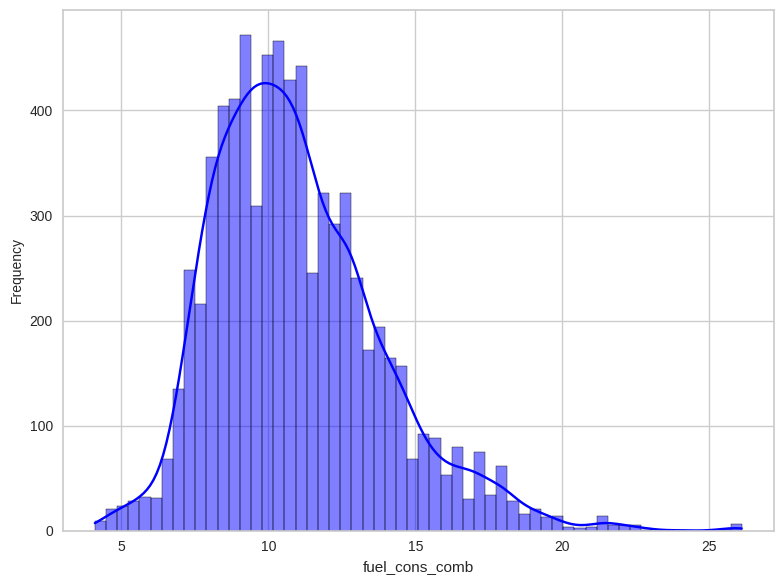

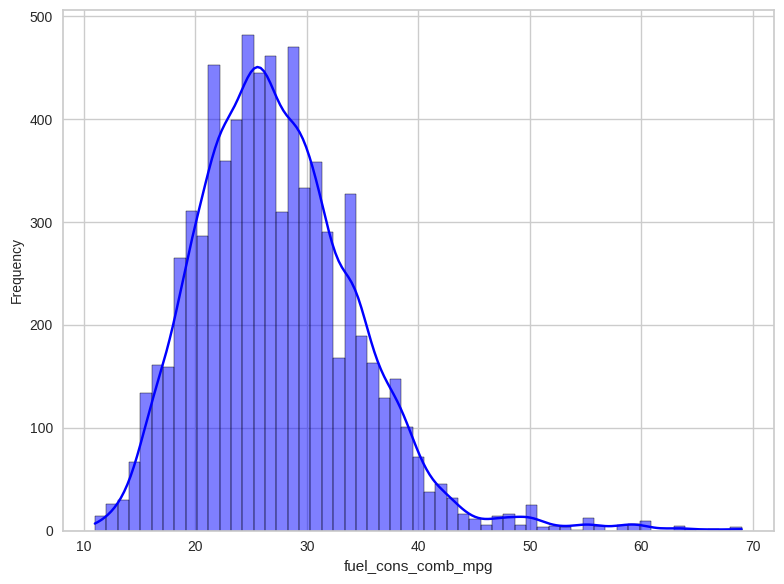

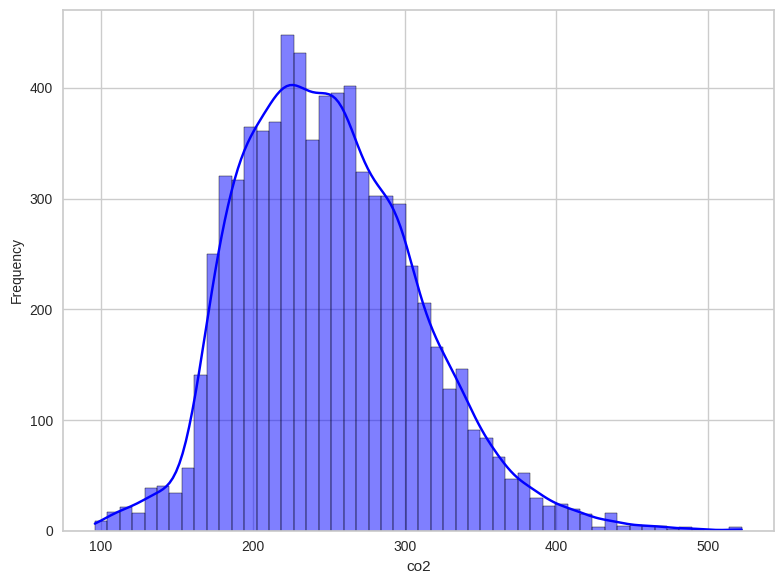

In [285]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    sns.histplot(data=df, x=var, kde=True, label = f'Distribution of {var}',color = "blue")
    plt.ylabel('Frequency', fontsize=10)
    plt.tight_layout()
    plt.show()

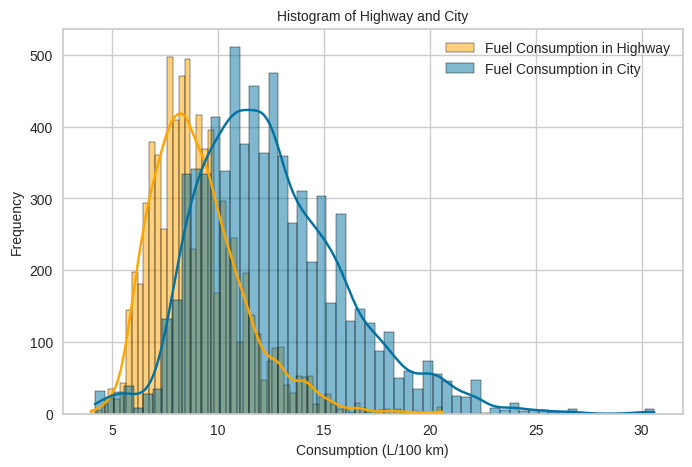

In [286]:
# Consumption of Highway and City

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="fuel_cons_hwy", kde=True, label = "Fuel Consumption in Highway",color = "orange")
sns.histplot(data=df, x="fuel_cons_city", kde=True, label = "Fuel Consumption in City")
plt.xlabel('Consumption (L/100 km)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title(f'Histogram of Highway and City', fontsize=10)
plt.legend()
plt.show()

## Observations
1. **Engine Size (engine_size):** The distribution is skewed with several peaks, indicating different types of vehicles with varying engine sizes.
2. **Cylinders:** The distribution is concentrated around specific values (4, 6, 8), reflecting common engine types in the dataset.
3. **Fuel Consumption City (fuel_cons_city):** The distribution is approximately normal, which is beneficial for model learning.
4. **Fuel Consumption Hwy (fuel_cons_hwy):** Similar to city fuel consumption, this also shows an approximately normal distribution.
5. **Fuel Consumption Combined (fuel_cons_comb):** The combined fuel consumption distribution is normal, making it a useful variable for modeling.
6. **Fuel Consumption MPG (fuel_cons_mpg):** This shows a normal distribution and has an inverse relationship with other fuel consumption metrics, which is expected.
7. **CO2 Emissions (co2):** The distribution is nearly normal, which is advantageous for regression models.

**Overall Evaluation:**
- Most features exhibit normal or skew-normal distributions, which are suitable for modeling.
- Consider multicollinearity, especially among `fuel_cons_City`, `fuel_cons_Hwy`, and `fuel_cons_Comb`.
- Features like `cylinders`, `engine_size`, and `fuel_cons_mpg` provide important information about vehicle performance and efficiency, making them valuable for the model.


<a id='target-fuel-consumption'></a>
## Target Variable vs Numerical Features

<a id='correlation-numerical'></a>
### Correlations of Numerical Features

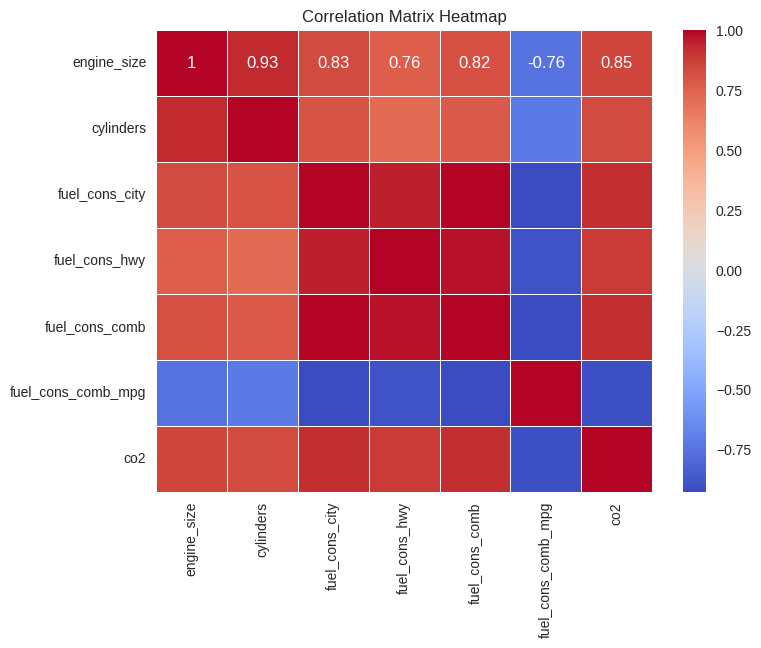

In [287]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation matrix shows strong multicollinearity among several features. Specifically:

- `fuel_cons_city`, `fuel_cons_hwy`, and `fuel_cons_comb` have very high correlations (0.95 and above), indicating they carry almost identical information.
- `engine_size` and `cylinders` are also highly correlated (0.93).
- `co2_emissions` has strong positive correlations with `fuel_cons_hwy`,`fuel_cons_comb`, `fuel_cons_city`, and `engine_size` (0.85 and above), indicating these features are important for predicting CO2 emissions.
- `fuel_cons_mpg` shows high negative correlations with other fuel consumption measures (-0.93 and above), as higher mpg indicates lower fuel consumption.

These findings suggest that removing some highly correlated features can help reduce multicollinearity and improve model performance.

## Pairplot for the Numerical Data of dataframe

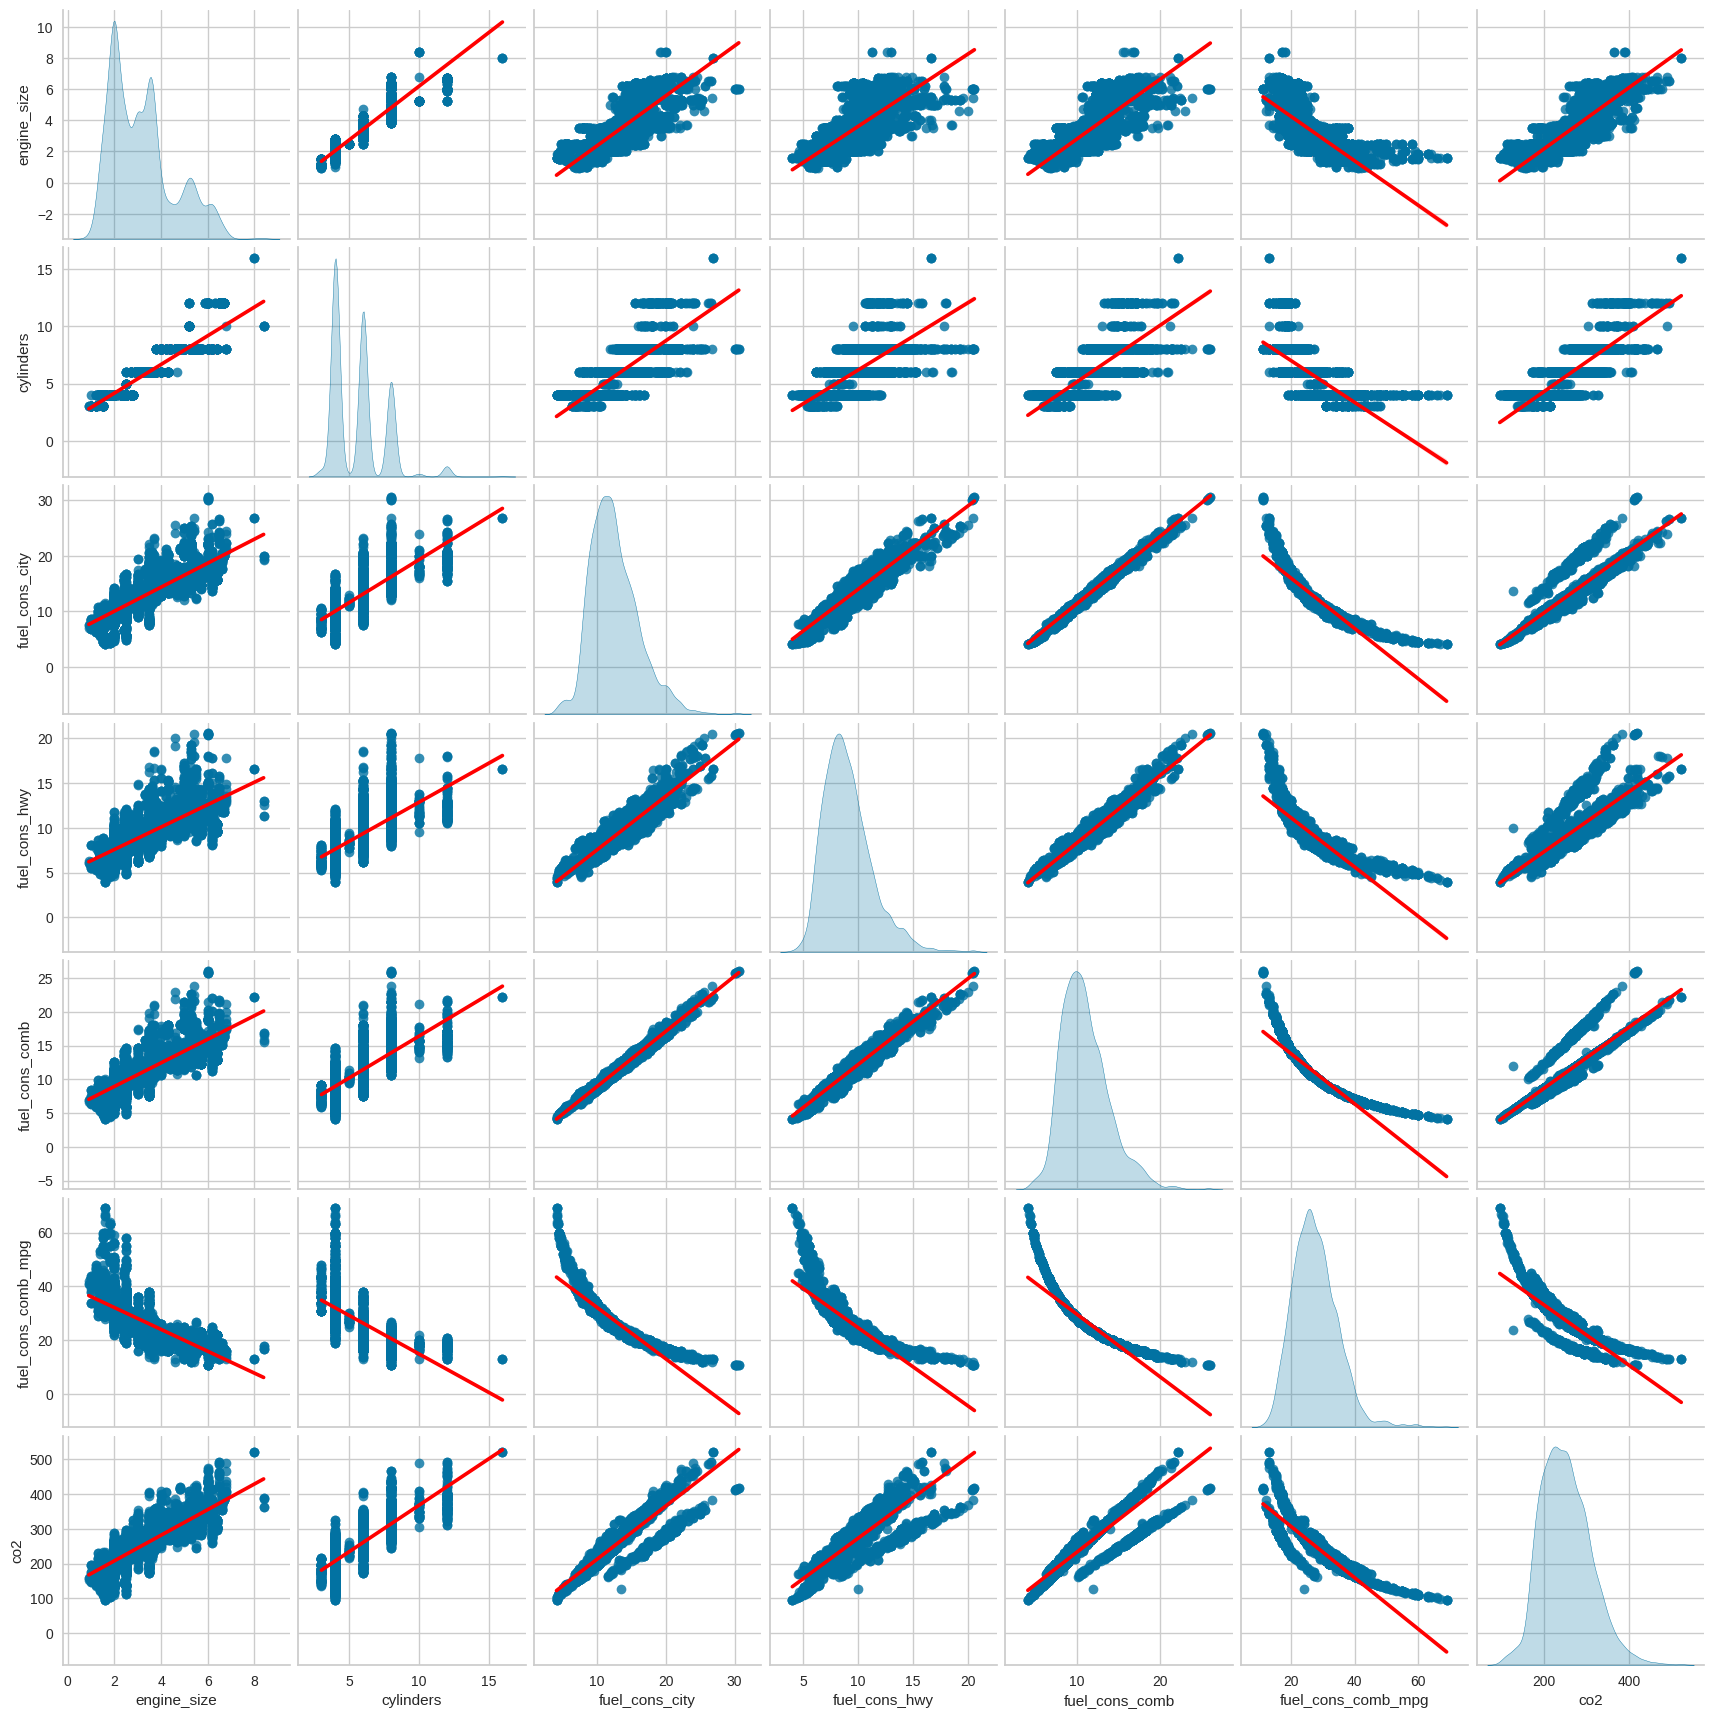

In [288]:
# Pairplot for the dataframe

sns.pairplot(df,
             kind="reg",
             diag_kind="kde", 
             plot_kws={"line_kws": {"color": "red"}}
            )

The pairplot shows the relationships and distributions between various numerical features in the dataset. Here's a brief analysis:

1. **Engine Size (engine_size):**
   - Positively correlated with `cylinders`, `fuel_cons_city`, `fuel_cons_hwy`, `fuel_cons_comb`, and `co2`.
   - Larger engines tend to have more cylinders and higher fuel consumption.

2. **Cylinders:**
   - Strong positive correlation with `engine_size` and fuel consumption metrics.
   - As the number of cylinders increases, fuel consumption and CO2 emissions also increase.

3. **Fuel Consumption City (fuel_cons_City):**
   - High positive correlation with `fuel_cons_hwy`, `fuel_cons_comb`, and `co2`.
   - Vehicles that consume more fuel in the city tend to consume more on highways and produce higher CO2 emissions.

4. **Fuel Consumption Hwy (fuel_cons_Hwy):**
   - Similar correlations as city fuel consumption, showing strong positive relationships with `fuel_cons_city`, `fuel_cons_comb`, and `co2`.

5. **Fuel Consumption Combined (fuel_cons_Comb):**
   - Very high correlation with both city and highway fuel consumption.
   - Indicative of overall vehicle efficiency.

6. **Fuel Consumption MPG (fuel_cons_mpg):**
   - Shows a strong negative correlation with other fuel consumption metrics and `co2`.
   - ***Higher MPG values indicate better fuel efficiency and lower CO2 emissions.***
   - fuel efficiency increases (mpg value increases), CO2 emissions decrease.
   
7. **CO2 Emissions (co2):**
   - Strongly correlated with `engine_size`, `cylinders`, `fuel_cons_city`, `fuel_cons_hwy`, and `fuel_cons_comb`.
   - ***Vehicles with larger engines, more cylinders, and higher fuel consumption emit more CO2***.

**Overall Evaluation:**
- The pairplot reveals strong relationships among features, particularly between engine size, fuel consumption, and CO2 emissions.
- The negative correlation between MPG and other features highlights its importance in representing fuel efficiency.
- Suggest focusing on features like `fuel_cons_comb`, `engine_size`, and `fuel_cons_mpg` for predictive modeling, while considering multicollinearity.

Text(86.47222222222221, 0.5, 'CO2 Emissions (g/km)')

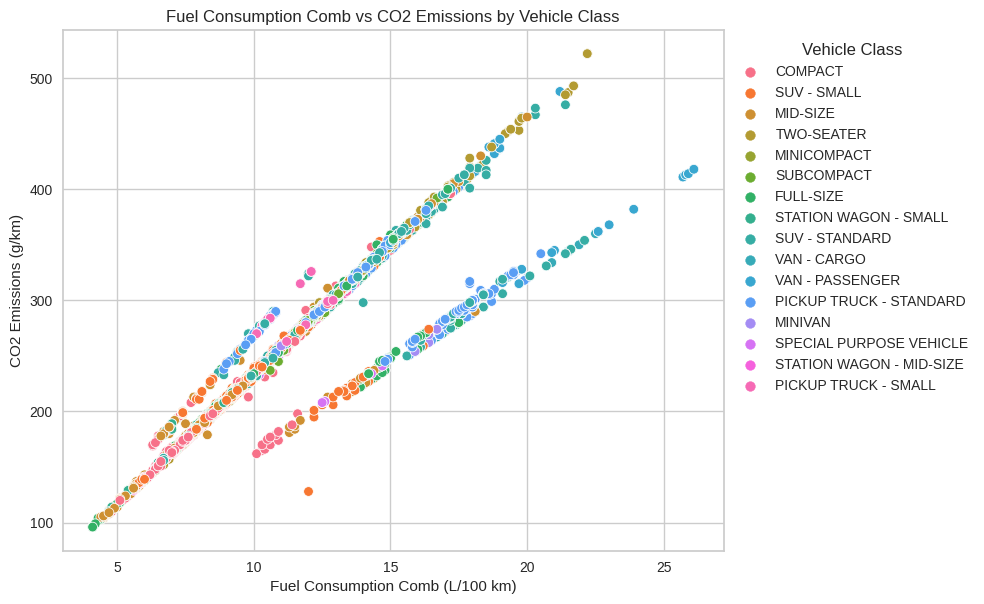

In [289]:
# Target vs Fuel Consumption Combined (city+hwy)
# Hue: Vehicle Class

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='fuel_cons_comb',y='co2',hue='vehicle_class')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Vehicle Class')
plt.tight_layout()

plt.title('Fuel Consumption Comb vs CO2 Emissions by Vehicle Class')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions (g/km)')



### Observation:
- Vehicle class makes impact on overall fuel efficiency of vehicle as well lead to more emission
- Two-Seater,Mid Size, Passenger van, Cargo van, Pick Up Truck have most emission with lowest fuel efficiency
- Mini Van, SPV, Station Wagon are more fuel efficienct with low emission

Text(0, 0.5, 'CO2 Emissions (g/km)')

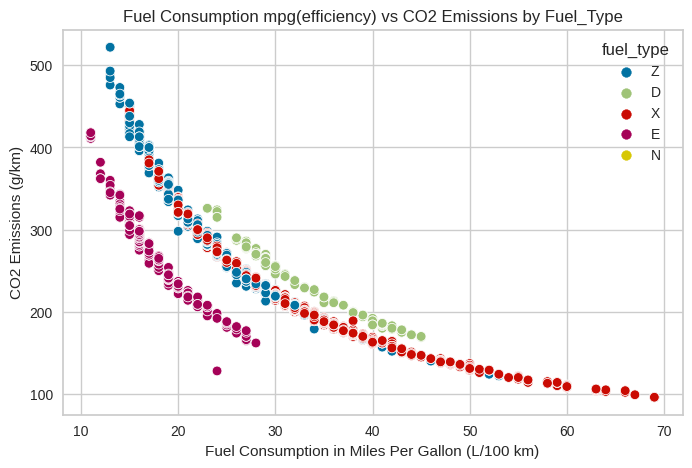

In [290]:
# Target vs Fuel Consumption in Miles Per Gallon (mpg)
# Hue: Fuel Type 

plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='fuel_cons_comb_mpg',y='co2',hue='fuel_type')

plt.title('Fuel Consumption mpg(efficiency) vs CO2 Emissions by Fuel_Type')
plt.xlabel('Fuel Consumption in Miles Per Gallon (L/100 km)')
plt.ylabel('CO2 Emissions (g/km)')

### Observation:
- Fuel Type makes impact on overall fuel efficiency of vehicle as well lead to less emission with Fuel Consumption
- Premium gasolin and Ethenol have most emission with lowest fuel efficiency
-  Regular gasoline has more efficiency of fuel as well lead to less emission 
- Dieselis is more fuel efficienct with low emission

<a id='outlier-analysis'></a>
## Outlier Analysis

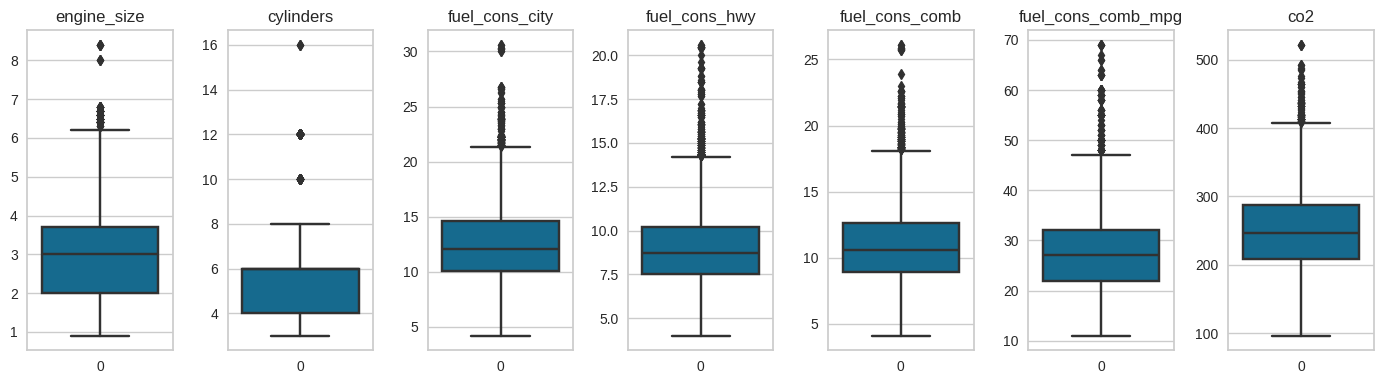

In [291]:
# Checking Outliers

# Initialize the subplot counter
x = 0

# Create a figure with specified size
plt.figure(figsize=(16, 4))

# Loop through each numerical column and create a boxplot
for col in df.select_dtypes(include=['number']).columns:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=df[col])
    plt.title(col)

# Show the plots
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()

<a id='skewness'></a>
## Skewness

- Calculate skewness for numeric features
- A skewness value greater than 1 indicates positive skewness,
- a skewness value less than -1 indicates negative skewness,
- and a skewness value close to zero indicates a relatively symmetric distribution.


In [292]:

num_cols= df.select_dtypes('number').columns

skew_limit = 0.75               # define a limit above which we will log transform
skew_vals = df[num_cols].skew()


# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

Skew
cylinders           1.110415
fuel_cons_hwy       1.079217
fuel_cons_comb_mpg  0.977034
fuel_cons_comb      0.893316
engine_size         0.809181
fuel_cons_city      0.809005

<a id='machine-learning'></a>
# <font color='orange'> <b>  MACHINE LEARNING</b><font color='orange'>


- The objective of creating and using a model with the CO2 emission dataset is to build machine learning algorithms capable of accurately predicting vehicle CO2 emissions based on their characteristics.
- By examining variables such as engine size, number of cylinders, and fuel consumption, the aim is to develop models that can evaluate the environmental impact of different vehicles and guide policy decisions aimed at reducing carbon emissions.
- Additionally, these models can support automotive manufacturers in designing more fuel-efficient vehicles and help consumers make informed choices when selecting vehicles with lower carbon footprints.
- Ultimately, the goal is to harness data-driven insights to mitigate the environmental impact of transportation and promote sustainable development.
- Evaluating model accuracy on both training and test sets is essential to determine whether the model is overfitting or underfitting the data, addressing the bias-variance tradeoff effectively.

<a id='simple-lr'></a>
## <font color=#20a0ff> <b>Simple Linear Regression Model</b><font color='black'>


- This simple linear regression model was built using only `fuel_cons_comb` as the predictor and the target variable `co2`, without any data manipulation. This is often referred to as a "vanilla model."


<Axes: xlabel='fuel_cons_comb', ylabel='co2'>

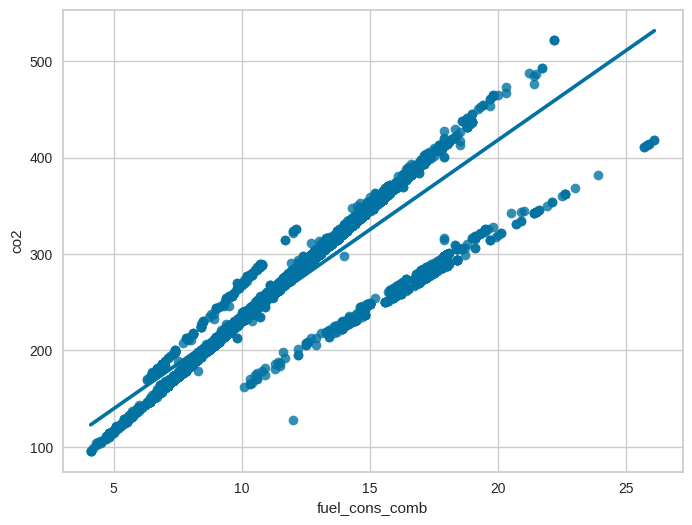

In [293]:
# Check the correlation between independent feature (fuel_cons_comb) and target variable (co2_emissions)

sns.regplot(x = 'fuel_cons_comb', y = 'co2', data=df, ci=None)

<a id='split-simple'></a>
### Splitting the Data

In [294]:
# Split the selected independent feature (fuel_cons_comb) and target variable (co2_emissions) for SIMPLE Linear Regression

X = df[['fuel_cons_comb']] 
y = df['co2'] 

<a id='train-test-simple'></a>
### Train | Test Split

In [295]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [296]:
# Display the shapes of the resulting datasets

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5538, 1)
X_test shape: (1847, 1)
y_train shape: (5538,)
y_test shape: (1847,)


<a id='model-simple'></a>
### Model

In [297]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


<a id='training-simple'></a>
### Training the Model

In [298]:
lin_reg.fit(X_train, y_train)

LinearRegression()

<a id='predict-simple'></a>
### Predicting Test Data

In [299]:
# Predict using the model on the test data

y_pred_test = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)

<a id='evaluate-simple'></a>
### Evaluating the Model

In [300]:
# Comparing Actual y_test, Predicted_y_test and Residuals
my_dict = {"Actual": y_test, "pred": y_pred_test, "residual": y_test - y_pred_test}
compare = pd.DataFrame(my_dict)
compare.head(20)

Actual        pred   residual
7261     253  249.309805   3.690195
4489     344  320.052022  23.947978
1539     322  307.020561  14.979439
3532     297  282.819276  14.180724
6418     308  292.127463  15.872537
3703     406  368.454592  37.545408
5976     242  240.001619   1.998381
4332     216  219.523608  -3.523608
5015     246  241.863256   4.136744
2087     223  226.970158  -3.970158
2126     283  275.372727   7.627273
4161     326  303.297287  22.702713
4814     274  264.202903   9.797097
486      251  249.309805   1.690195
6607     322  303.297287  18.702713
1128     382  355.423131  26.576869
5159     248  243.724893   4.275107
5391     193  200.907235  -7.907235
6643     204  208.353785  -4.353785
6003     211  213.938696  -2.938696

#### Performance Metrics

In [301]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

R2Score_test=r2_score(y_test, y_pred_test)
mae_test=mean_absolute_error(y_test, y_pred_test)
mse_test=mean_squared_error(y_test, y_pred_test)                         
rmse_test=np.sqrt(mean_squared_error(y_test, y_pred_test))


R2Score_train=r2_score(y_train, y_pred_train)
mae_train=mean_absolute_error(y_train, y_pred_train)
mse_train=mean_squared_error(y_train, y_pred_train)                         
rmse_train=np.sqrt(mean_squared_error(y_train, y_pred_train))

print("performance Metrics of Simple linear Regression for Train and Test data")
print("\t\t Train_data  | Test_data")
print("-------------------------------------------------------------")
print("R2 Score ",R2Score_train,"|",R2Score_test)
print("MAE      ",mae_train,"|",mae_test)
print("MSE      ",mse_train," |",mse_test)
print("RMSE     ",rmse_train,"|",rmse_test)


scores = {
    "Simple_test": {"R2" : R2Score_test,
    "mae" : mae_test,
    "mse" : mse_test,                          
    "rmse" : rmse_test},
    
    "Simple_train": {"R2" : R2Score_train,
    "mae" : mae_train,
    "mse" : mse_train,                          
    "rmse" : rmse_train}
    }

slr_score=pd.DataFrame(scores)

slr_score

performance Metrics of Simple linear Regression for Train and Test data
		 Train_data  | Test_data
-------------------------------------------------------------
R2 Score  0.8443308529162576 | 0.8381501636019864
MAE       13.901692049585145 | 14.233495693123851
MSE       533.4385730402728  | 552.1010877577722
RMSE      23.096289161687267 | 23.496831440808613


Simple_test  Simple_train
R2       0.838150      0.844331
mae     14.233496     13.901692
mse    552.101088    533.438573
rmse    23.496831     23.096289

In [302]:
slr_score

Simple_test  Simple_train
R2       0.838150      0.844331
mae     14.233496     13.901692
mse    552.101088    533.438573
rmse    23.496831     23.096289

In [303]:
rmse_test/df['co2'].mean()

0.0937680215968133

- To determine how much the error deviates from the mean of the target label. 
- According to the RMSE metric, our model has an average error rate of 9.3%. 
- Prefer the RMSE metric because it penalizes poor predictions. 

**Conclusion**
- This simple linear regression model was built using only Fuel Consumption Combined (city+hwy) as the predictor and the target variable, without any data manipulation. 

- The model explains 83.8% of the variance in the target variable, indicating a good fit but with room for improvement.

<a id='multiple-lr'></a>
## <font color=#20a0ff> <b>Multiple Linear Regression Model</b><font color='black'>


- We will now create a multiple linear regression model using 'engine_size', 'fuel_cons_comb', 'fuel_cons_hwy', and 'fuel_cons_city' as the independent variables and the target variable. 
- This model aims to capture the relationship between multiple predictors and the target variable for better prediction accuracy and insights.

<a id='split-multiple'></a>
### Splitting the Data

In [304]:
X = df[["engine_size", "cylinders", "fuel_cons_comb", "fuel_cons_comb_mpg"]]
y = df["co2"]

In [305]:
X.head()

engine_size  cylinders  fuel_cons_comb  fuel_cons_comb_mpg
0          2.0          4             8.5                  33
1          2.4          4             9.6                  29
2          1.5          4             5.9                  48
3          3.5          6            11.1                  25
4          3.5          6            10.6                  27

In [306]:
# Check Multicolinarty between features
pd.DataFrame(X).corr()

engine_size  cylinders  fuel_cons_comb  fuel_cons_comb_mpg
engine_size            1.000000   0.927653        0.817060           -0.757854
cylinders              0.927653   1.000000        0.780534           -0.719321
fuel_cons_comb         0.817060   0.780534        1.000000           -0.925576
fuel_cons_comb_mpg    -0.757854  -0.719321       -0.925576            1.000000

<a id='train-test-multiple'></a>
### Train | Test Split

In [307]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [308]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape: {}\ny Test features shape: {}" 
      .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (5169, 4)
y Train features shape: (5169,)
X Test features shape: (2216, 4)
y Test features shape: (2216,)


<a id='model-multiple'></a>
### Model

In [309]:
from sklearn.linear_model import LinearRegression

Multi_lin_reg = LinearRegression()

<a id='training-simple'></a>
### Training the Model

In [310]:
Multi_lin_reg.fit(X_train, y_train)

LinearRegression()

<a id='predict-multiple'></a>
### Predicting Test Data

In [311]:
y_pred_test = Multi_lin_reg.predict(X_test)
y_pred_train = Multi_lin_reg.predict(X_train) 

In [312]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

R2Score_test=r2_score(y_test, y_pred_test)
mae_test=mean_absolute_error(y_test, y_pred_test)
mse_test=mean_squared_error(y_test, y_pred_test)                         
rmse_test=np.sqrt(mean_squared_error(y_test, y_pred_test))


R2Score_train=r2_score(y_train, y_pred_train)
mae_train=mean_absolute_error(y_train, y_pred_train)
mse_train=mean_squared_error(y_train, y_pred_train)                         
rmse_train=np.sqrt(mean_squared_error(y_train, y_pred_train))

print("performance Metrics of Multiple Linear Regression for Train and Test data")
print("\t\t Train_data  | Test_data")
print("-------------------------------------------------------------")
print("R2 Score ",R2Score_train,"|",R2Score_test)
print("MAE      ",mae_train,"|",mae_test)
print("MSE      ",mse_train," |",mse_test)
print("RMSE     ",rmse_train,"|",rmse_test)


scores = {
    "MultiLinear_test": {"R2" : R2Score_test,
    "mae" : mae_test,
    "mse" : mse_test,                          
    "rmse" : rmse_test},
    
    "MultiLinear_train": {"R2" : R2Score_train,
    "mae" : mae_train,
    "mse" : mse_train,                          
    "rmse" : rmse_train}
    }

Mlr_score=pd.DataFrame(scores)

Mlr_score

performance Metrics of Multiple Linear Regression for Train and Test data
		 Train_data  | Test_data
-------------------------------------------------------------
R2 Score  0.9038767582625543 | 0.9001077496796939
MAE       11.43668932277986 | 11.514613831965189
MSE       330.8291640651209  | 337.4066070610968
RMSE      18.18870979660517 | 18.368631061162308


MultiLinear_test  MultiLinear_train
R2            0.900108           0.903877
mae          11.514614          11.436689
mse         337.406607         330.829164
rmse         18.368631          18.188710

<a id='cross-validate'></a>
### Cross Validation for Multiple Linear

In [313]:
from sklearn.model_selection import cross_validate, cross_val_score

model = LinearRegression()
scores = cross_validate(model, X_train, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error'], cv = 10, return_train_score=True)

In [314]:
pd.DataFrame(scores, index = range(1,11))

fit_time  score_time   test_r2  train_r2  test_neg_mean_absolute_error  \
1   0.004916    0.001419  0.917568  0.902321                    -10.966634   
2   0.002119    0.001454  0.898006  0.904529                    -11.705880   
3   0.001940    0.001363  0.892331  0.904956                    -11.329495   
4   0.002944    0.001299  0.920210  0.902001                    -10.763197   
5   0.001949    0.001306  0.875318  0.906981                    -12.949277   
6   0.002143    0.001394  0.894262  0.904821                    -11.368600   
7   0.002121    0.001284  0.915373  0.902485                    -10.922760   
8   0.001896    0.001249  0.917338  0.902337                    -11.034622   
9   0.002109    0.001174  0.898096  0.904445                    -11.276306   
10  0.004394    0.001843  0.902799  0.903967                    -12.168696   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                      -11.495846                  -280.218171   
2                      -11.445247                  -358.809708   
3                      -11.403127                  -322.546210   
4                      -11.491006                  -279.055713   
5                      -11.241349                  -428.067312   
6                      -11.380240                  -339.357892   
7                      -11.508300                  -310.967821   
8                      -11.543714                  -287.793779   
9                      -11.467861                  -326.238550   
10                     -11.382183                  -383.955085   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                    -336.492891                        -16.739718   
2                    -327.759612                        -18.942273   
3                    -331.783466                        -17.959572   
4                    -336.650751                        -16.704961   
5                    -320.045190                        -20.689788   
6                    -329.958182                        -18.421669   
7                    -333.053611                        -17.634280   
8                    -335.691214                        -16.964486   
9                    -331.372363                        -18.062075   
10                   -325.032680                        -19.594772   

    train_neg_root_mean_squared_error  
1                          -18.343743  
2                          -18.104132  
3                          -18.214924  
4                          -18.348045  
5                          -17.889807  
6                          -18.164751  
7                          -18.249756  
8                          -18.321878  
9                          -18.203636  
10                         -18.028663

In [315]:
pd.DataFrame(scores, index = range(1,11)).iloc[:, 2:].mean()

test_r2                                0.903130
train_r2                               0.903884
test_neg_mean_absolute_error         -11.448547
train_neg_mean_absolute_error        -11.435887
test_neg_mean_squared_error         -331.701024
train_neg_mean_squared_error        -330.783996
test_neg_root_mean_squared_error     -18.171359
train_neg_root_mean_squared_error    -18.186934
dtype: float64

* The fact that this score obtained after Cross Validation and Train-test score are compatible indicates that the model has generalization ability.

**Compatibility and Generalization Ability:**

- **Good Generalization:** If both the cross-validation score and the train-test score are similar and high, it indicates that the model is performing well both on the training data and the unseen test data. This consistency suggests that the model is not overfitting to the training data and is likely to generalize well to new, unseen data.

- **Overfitting:** Conversely, if the cross-validation score is high but the train-test score is significantly lower, this might indicate that the model is overfitting to the training data and may not perform as well on new, unseen data.

- **Underfitting:** If both scores are low, it may suggest that the model is underfitting and not capturing the underlying patterns in the data effectively.

#### Comparing the Scores Multi & Simple Linear Regression

In [316]:
pd.concat([slr_score, Mlr_score], axis=1)

# Concatinated simple linear ve multiple linear models scores



Simple_test  Simple_train  MultiLinear_test  MultiLinear_train
R2       0.838150      0.844331          0.900108           0.903877
mae     14.233496     13.901692         11.514614          11.436689
mse    552.101088    533.438573        337.406607         330.829164
rmse    23.496831     23.096289         18.368631          18.188710

In [317]:
rmse_test/df['co2'].mean()

0.07330308337044823

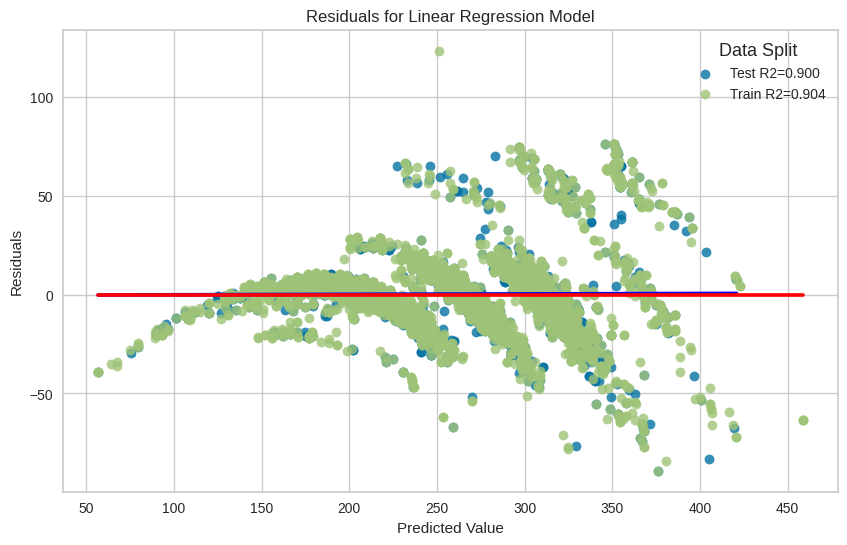

In [333]:
# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Plot residuals for test data
sns.regplot(x=y_pred_test, y=(y_pred_test-y_test ), ci=None, label='Test R2=0.900', scatter_kws={'s':50}, line_kws={'color':'blue'})

# Plot residuals for train data
sns.regplot(x=y_pred_train, y=(y_pred_train- y_train ), ci=None, label='Train R2=0.904', scatter_kws={'s':50}, line_kws={'color':'red'})

# Add title and labels
plt.title('Residuals for Linear Regression Model')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')

# Add legend with customization
plt.legend(loc='best', title='Data Split', title_fontsize='13', fontsize='10')

# Show the plot
plt.show()

- To determine how much the error deviates from the mean of the target label. 
- According to the RMSE metric, our model has an average error rate of 7.3%. 
- Prefer the RMSE metric because it penalizes poor predictions. 


- the Multi linear regression model has good performance, with \( R^2 \) values of 0.904 for the training set and 0.900 for the test set. 
- Most residuals are close to zero, indicating accurate predictions. 
- However, there are systematic errors as residuals increase with predicted values, suggesting the model may be biased for higher values. 
- Additionally, the spread of residuals indicates the variance of errors is not constant. This suggests potential areas for model improvement.

the prediction error for a linear regression model with an ( R^2 ) value of 0.900, indicating that 90% of the variance in the target variable is explained by the model.
Overall, the model performs well with a high degree of accuracy.

<a id='polynomial-features'></a>
## <font color=#20a0ff> <b>Polynomial Features </b><font color='black'>

In [334]:
from sklearn.preprocessing import PolynomialFeatures

def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False) 
        poly_features = polynomial_converter.fit_transform(X)                      
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, 
                         "number of features":number_of_features}, index=range(1,d))

In [336]:
poly(10)

# The poly(10) function creates polynomial regression models of degrees 1 to 10, 
# evaluates their training and test RMSE, and returns a DataFrame summarizing these errors and 
# the number of features used at each degree.

train_rmse_errors  test_rmse_errors  number of features
1          18.314047         18.087420                   4
2          15.788285         15.680230                  14
3          14.314294         13.914205                  34
4          12.916365         12.699119                  69
5          12.093931         12.490365                 125
6          11.139029         13.456785                 209
7          19.939588        116.936156                 329
8          12.676781        396.862449                 494
9          11.968498       1001.277554                 714

This table shows RMSE and feature counts for polynomial regression models of different degrees. 

**Key insights:**

- **Performance Improvement**: RMSE decreases up to the 6th degree, indicating better performance.
- **Optimal Degree**: The 6th degree has the lowest test RMSE (13.456785).
- **Overfitting**: The 7th degree shows overfitting with a high test RMSE (116.936156).
- **Feature Count**: The 4th degree model, with 69 features, achieves similar performance to the 5th degree model (125 features), making it more efficient and cost-effective.

*The 4th degree is preferable for reducing computational cost while maintaining performance.*

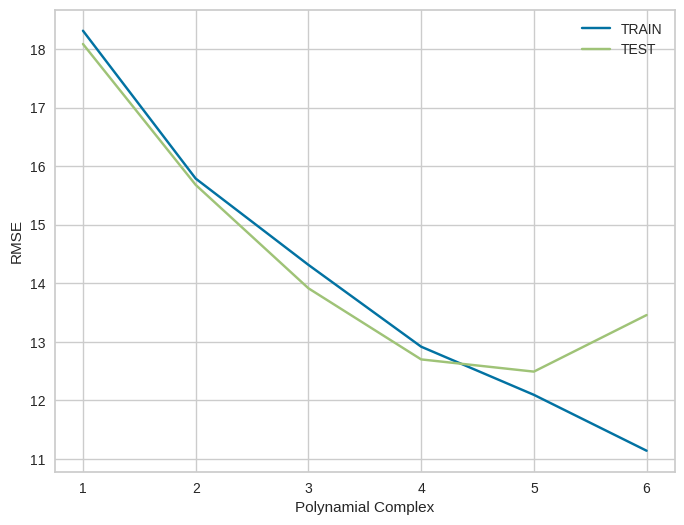

In [343]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend()
plt.show()

<a id='poly-degree4'></a>
### Poly(degree=4)

In [346]:
# Selected degree=4

poly_converter = PolynomialFeatures(degree = 4, include_bias=False)

<a id='model-poly'></a>
#### Model

In [347]:
# Poly linear model

poly_lin_reg = LinearRegression()

<a id='train-test-poly'></a>
#### Train | Test Split

In [348]:
X_train, X_test, y_train, y_test = train_test_split(poly_converter.fit_transform(X), y,
                                                    test_size = 0.2, random_state = 42)

<a id='training-poly'></a>
#### Training the Model

In [349]:
poly_lin_reg.fit(X_train, y_train)

LinearRegression()

<a id='predict-poly'></a>
#### Predicting Test Data

In [353]:
y_pred_train = poly_lin_reg.predict(X_train)
y_pred_test = poly_lin_reg.predict(X_test)

In [354]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

R2Score_test=r2_score(y_test, y_pred_test)
mae_test=mean_absolute_error(y_test, y_pred_test)
mse_test=mean_squared_error(y_test, y_pred_test)                         
rmse_test=np.sqrt(mean_squared_error(y_test, y_pred_test))


R2Score_train=r2_score(y_train, y_pred_train)
mae_train=mean_absolute_error(y_train, y_pred_train)
mse_train=mean_squared_error(y_train, y_pred_train)                         
rmse_train=np.sqrt(mean_squared_error(y_train, y_pred_train))

print("performance Metrics of Multiple Linear Regression for Train and Test data")
print("\t\t Train_data  | Test_data")
print("-------------------------------------------------------------")
print("R2 Score ",R2Score_train,"|",R2Score_test)
print("MAE      ",mae_train,"|",mae_test)
print("MSE      ",mse_train," |",mse_test)
print("RMSE     ",rmse_train,"|",rmse_test)


scores = {
    "MultiLinear_test": {"R2" : R2Score_test,
    "mae" : mae_test,
    "mse" : mse_test,                          
    "rmse" : rmse_test},
    
    "MultiLinear_train": {"R2" : R2Score_train,
    "mae" : mae_train,
    "mse" : mse_train,                          
    "rmse" : rmse_train}
    }

PolyRegression_score=pd.DataFrame(scores)

PolyRegression_score

performance Metrics of Multiple Linear Regression for Train and Test data
		 Train_data  | Test_data
-------------------------------------------------------------
R2 Score  0.953385177136985 | 0.9476458268934926
MAE       6.042713207467257 | 6.426362331953849
MSE       159.35515025782811  | 180.07884908237864
RMSE      12.623594981534701 | 13.419346075065604


MultiLinear_test  MultiLinear_train
R2            0.947646           0.953385
mae           6.426362           6.042713
mse         180.078849         159.355150
rmse         13.419346          12.623595

<a id='compare-poly'></a>
#### Comparison of Simple Linear ,Multiple Linear & Poly Multiple Linear Regression

In [357]:
result = pd.concat([slr_score,Mlr_score, PolyRegression_score], axis=1)
result

Simple_test  Simple_train  MultiLinear_test  MultiLinear_train  \
R2       0.838150      0.844331          0.900108           0.903877   
mae     14.233496     13.901692         11.514614          11.436689   
mse    552.101088    533.438573        337.406607         330.829164   
rmse    23.496831     23.096289         18.368631          18.188710   

      MultiLinear_test  MultiLinear_train  
R2            0.947646           0.953385  
mae           6.426362           6.042713  
mse         180.078849         159.355150  
rmse         13.419346          12.623595

## Observation:
- The polynomial regression model (degree 4) performs better than the multiple linear and SimpleLinear  regression model, achieving higher \( R^2 \) values 
- and lower MAE, MSE, and RMSE on both training and test sets, indicating better overall performance and accuracy.